# A Network of Thrones - Season 4

---



**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [1]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 28.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [4]:
relations_df = pd.read_csv(folder+"data/got-s4-edges.csv")
characters_df  = pd.read_csv(folder+"data/got-s4-nodes.csv")

In [5]:
# Delete self-loops - there are no self-loops in the data.

#self_loop = []
#for i in range(len(relations)):
#  if relations["Source"][i] == relations["Target"][i]:
#    self_loop.append(i)
#
#
#relations = relations.drop(set(self_loop)).reset_index()

In [6]:
import networkx as nx

# Check for duplicate Ids
duplicates = characters_df[characters_df.duplicated('Id', keep=False)]
if not duplicates.empty:
    print("Duplicate Ids found in characters_df:")
    print(duplicates)

# Remove duplicates based on Id (keeping the first occurrence)
characters_df = characters_df.drop_duplicates(subset='Id')

# Create the NetworkX graph from the edge list
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Convert characters DataFrame to dictionary and add nodes with attributes
characters = characters_df.set_index('Id').to_dict('index')

G.add_nodes_from(characters.items())
print(G.nodes(data=True))
print(G.edges(data=True))


[('ARYA', {'Label': 'Arya'}), ('HOUND', {'Label': 'Sandor'}), ('JAIME', {'Label': 'Jaime'}), ('TYRION', {'Label': 'Tyrion'}), ('CERSEI', {'Label': 'Cersei'}), ('DAENERYS', {'Label': 'Daenerys'}), ('JORAH', {'Label': 'Jorah'}), ('TYWIN', {'Label': 'Tywin'}), ('LITTLEFINGER', {'Label': 'Petyr'}), ('SANSA', {'Label': 'Sansa'}), ('JON', {'Label': 'Jon'}), ('SAM', {'Label': 'Sam'}), ('LYSA', {'Label': 'Lysa'}), ('BRONN', {'Label': 'Bronn'}), ('PODRICK', {'Label': 'Podrick'}), ('GILLY', {'Label': 'Gilly'}), ('OBERYN', {'Label': 'Oberyn'}), ('BRIENNE', {'Label': 'Brienne'}), ('SHAE', {'Label': 'Shae'}), ('ALLISER_THORNE', {'Label': 'Alliser Thorne'}), ('JOFFREY', {'Label': 'Joffrey'}), ('MISSANDEI', {'Label': 'Missandei'}), ('RAMSAY', {'Label': 'Ramsay'}), ('THEON', {'Label': 'Theon'}), ('DAARIO', {'Label': 'Daario'}), ('GRENN', {'Label': 'Grenn'}), ('DAVOS', {'Label': 'Davos'}), ('STANNIS', {'Label': 'Stannis'}), ('GREY_WORM', {'Label': 'Grey Worm'}), ('MANCE', {'Label': 'Mance'}), ('ELLARIA

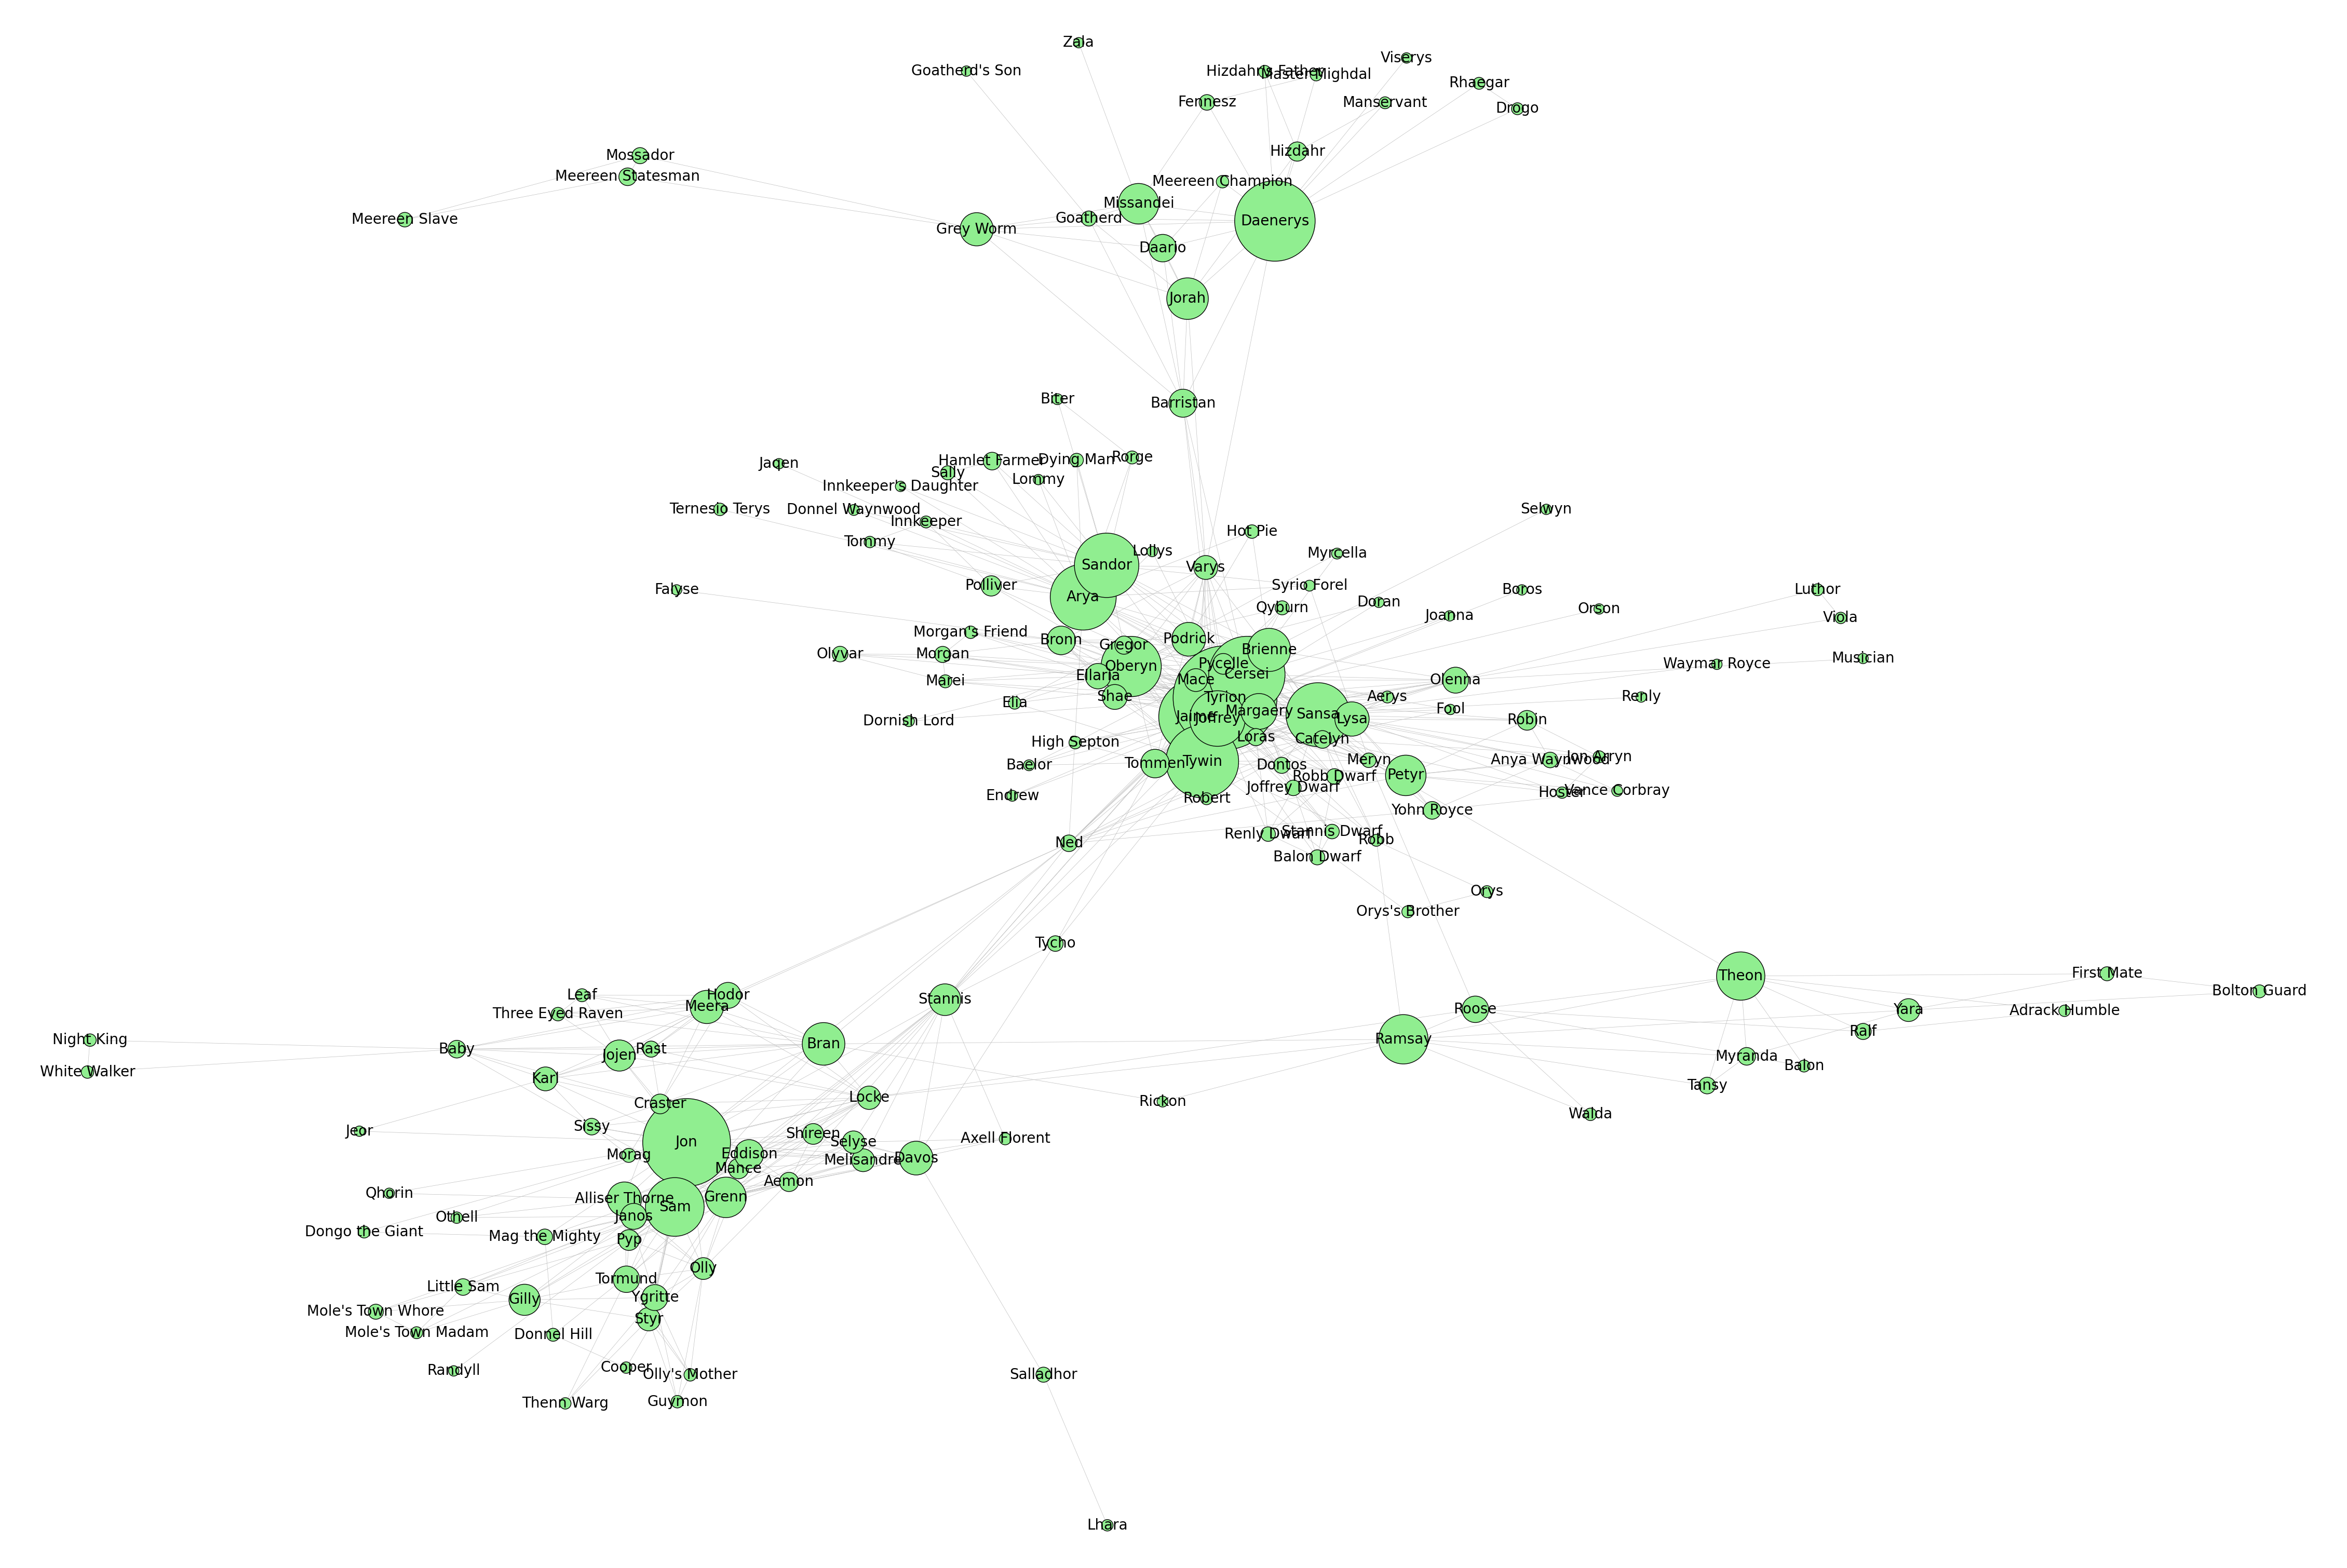

In [7]:
g = ig.Graph.from_networkx(G)


spring_layout = nx.spring_layout(G)


node_colors = ["LightGreen" for _ in range(len(G.nodes()))]


pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)

# Set the node sizes based on PageRank
min_size = 20  # Minimum node size
max_size = 200  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))


positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores


fig, ax = plt.subplots(figsize=(45, 30))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()



In [8]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "CERSEI"
node2 = "MARGAERY"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

The strength of the edge between 'CERSEI' and 'MARGAERY' is 38.


Let's list the various characters

In [9]:
for nm in g.vs():
  print(nm['Label'])

Arya
Sandor
Jaime
Tyrion
Cersei
Daenerys
Jorah
Tywin
Petyr
Sansa
Jon
Sam
Lysa
Bronn
Podrick
Gilly
Oberyn
Brienne
Shae
Alliser Thorne
Joffrey
Missandei
Ramsay
Theon
Daario
Grenn
Davos
Stannis
Grey Worm
Mance
Ellaria
Bran
Meera
Margaery
Olenna
Robin
Hodor
Jojen
Tommen
Eddison
Janos
Roose
Melisandre
Selyse
Tormund
Barristan
Varys
Pyp
Styr
Ygritte
Dontos
Yohn Royce
Polliver
Pycelle
Shireen
Aemon
Hizdahr
Mole's Town Whore
Hot Pie
Anya Waynwood
Locke
Mace
Olyvar
Hamlet Farmer
Little Sam
Yara
Qyburn
Tycho
Morgan
Gregor
Ralf
Ternesio Terys
Karl
Myranda
Fennesz
Tansy
Salladhor
Elia
Loras
Olly
Rast
Dying Man
Catelyn
Sally
Sissy
Morgan's Friend
Three Eyed Raven
Craster
Marei
Balon Dwarf
Robb Dwarf
Donnel Hill
Morag
Bolton Guard
Leaf
Meereen Champion
Dongo the Giant
Mag the Mighty
Dornish Lord
Endrew
Guymon
Hizdahr's Father
Mole's Town Madam
Ned
Renly Dwarf
Stannis Dwarf
Othell
Balon
Myrcella
Meereen Statesman
Mossador
First Mate
Goatherd
Rorge
Joffrey Dwarf
Jon Arryn
Meryn
Orson
Master Mighdal
Hi

### Size

In [10]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

Number of possible edges (N*(N-1)): 14196
Number of nodes (Graph Order): 169
Number of edges (Graph Size): 664
Graph Density: 0.04677373908143139


### Distribution

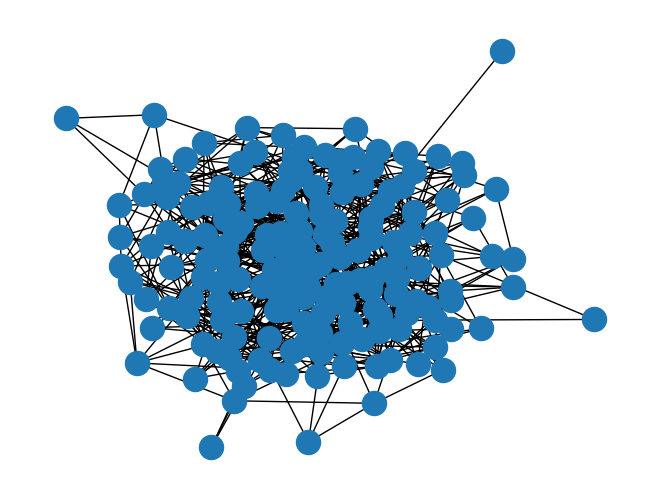

In [11]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [12]:
#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("number of nodes in random net:", len(rand_net.nodes()), "number of edges in random net", len(rand_net.edges()))
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

number of nodes in random net: 169 number of edges in random net 707
average shortest path for the random network 2.638067061143984
clustering coefficient for the random network 0.051977475863657516


In [13]:
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)


# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the original network", avg_shortest_path / nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the original network", nx.average_clustering(G) / nx.average_clustering(rand_net))


normalised average shortest path for the original network 1.316128170894526
normalised clustering coefficient for the original network 12.823055191283924


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [14]:
# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
lambda_val = avg_shortest_path / nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G) / nx.average_clustering(rand_net)

# Check small-world criteria
if lambda_val >= 1 and gamma_val > 1:
    print("This network is a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
    print("This network is not a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")


This network is a small-world network
Lambda value: 1.316128170894526, Gamma value: 12.823055191283924


In [15]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [16]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

Graph is connected


### Diameter

The diameter is the highest distance in the network

In [17]:
print("Graph Diameter:", g.diameter(directed=False))

Graph Diameter: 8


Path between most distant nodes: ['Bolton Guard', 'Yara', 'Ramsay', 'Robb', 'Joffrey', 'Barristan', 'Grey Worm', 'Meereen Statesman', 'Meereen Slave']


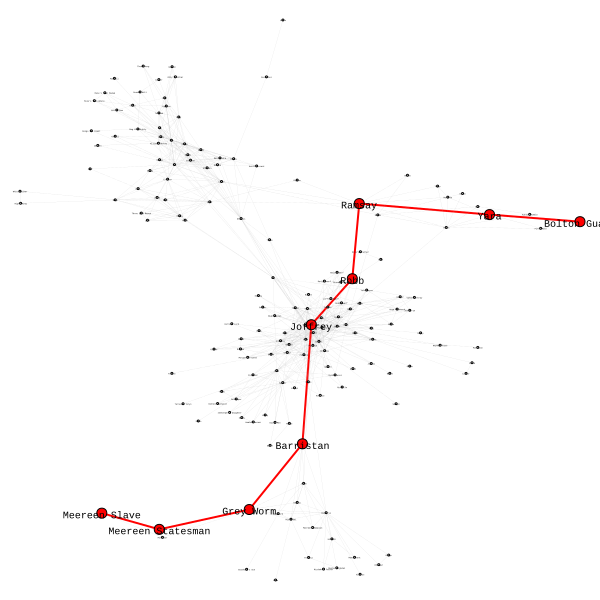

In [18]:
import networkx as nx
import igraph as ig

# Calculate the diameter path using igraph
d = g.get_diameter()

# GET NODES IN THE DIAMETER PATH
diameter_path = d

# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(pairs=[(d[i], d[i+1]) for i in range(len(d)-1)], directed=False)


visual_style = {
    "vertex_color": ["red" if node.index in diameter_path else "white" for node in g.vs],
    "edge_color": ["red" if edge.index in diameter_edges else "grey" for edge in g.es],
    "edge_width": [2 if edge.index in diameter_edges else 0.1 for edge in g.es],
    "vertex_label": [node["Label"] for node in g.vs],
    "vertex_size": [10 if node.index in diameter_path else 2 for node in g.vs],
    "vertex_label_size": [10 if node.index in diameter_path else 2 for node in g.vs]

}

print("Path between most distant nodes:", [g.vs[index]["Label"] for index in diameter_path])




ig.plot(g, **visual_style)


### Shortest Paths

Shortest paths between Daenerys and other nodes [['Daenerys', 'Varys', 'Podrick', 'Arya'], ['Daenerys', 'Varys', 'Sansa', 'Arya'], ['Daenerys', 'Varys', 'Jaime', 'Arya'], ['Daenerys', 'Varys', 'Sandor', 'Arya'], ['Daenerys', 'Barristan', 'Joffrey', 'Arya'], ['Daenerys', 'Varys', 'Joffrey', 'Arya'], ['Daenerys', 'Varys', 'Sandor'], ['Daenerys', 'Varys', 'Jaime'], ['Daenerys', 'Varys', 'Tyrion'], ['Daenerys', 'Varys', 'Cersei'], ['Daenerys', 'Barristan', 'Cersei'], ['Daenerys'], ['Daenerys', 'Jorah'], ['Daenerys', 'Varys', 'Tywin'], ['Daenerys', 'Varys', 'Sansa', 'Petyr'], ['Daenerys', 'Varys', 'Tywin', 'Petyr'], ['Daenerys', 'Varys', 'Tyrion', 'Petyr'], ['Daenerys', 'Barristan', 'Joffrey', 'Petyr'], ['Daenerys', 'Varys', 'Joffrey', 'Petyr'], ['Daenerys', 'Varys', 'Sansa'], ['Daenerys', 'Varys', 'Joffrey', 'Stannis', 'Jon'], ['Daenerys', 'Barristan', 'Joffrey', 'Stannis', 'Jon'], ['Daenerys', 'Varys', 'Jaime', 'Stannis', 'Jon'], ['Daenerys', 'Varys', 'Tywin', 'Stannis', 'Jon'], ['Daenery

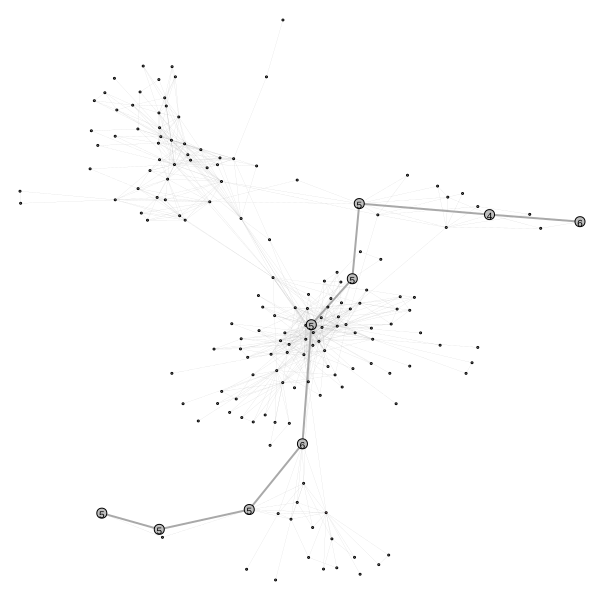

In [19]:
# SHORTEST PATHS
shortest_paths = {}
for node in nodes:
    shortest_paths[node["Label"]]=[nodes[v]["Label"] for v in g.get_all_shortest_paths(node)
                                                    ]
# SHOW DISTANCES OF SHORTEST PATHS BETWEEN ONE NODE AND EVERYBODY ELSE

node_name = "Daenerys"
print("Shortest paths between", node_name,"and other nodes", shortest_paths[node_name])

distances = [len(path) for path in shortest_paths[node_name]]

visual_style["vertex_color"] = ["pink" if node["Label"]==node_name else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

visual_style["vertex_label"] = distances

ig.plot(g, **visual_style)

In [20]:
sp = dict(nx.shortest_path(G)) #between all nodes
print(sp)

{'ARYA': {'ARYA': ['ARYA'], 'HOUND': ['ARYA', 'HOUND'], 'BRIENNE': ['ARYA', 'BRIENNE'], 'POLLIVER': ['ARYA', 'POLLIVER'], 'TERNESIO_TERYS': ['ARYA', 'TERNESIO_TERYS'], 'FARMER_HAMLET': ['ARYA', 'FARMER_HAMLET'], 'DYING_MAN': ['ARYA', 'DYING_MAN'], 'SALLY': ['ARYA', 'SALLY'], 'RORGE': ['ARYA', 'RORGE'], 'CATELYN': ['ARYA', 'CATELYN'], 'HOT_PIE': ['ARYA', 'HOT_PIE'], 'JOFFREY': ['ARYA', 'JOFFREY'], 'NED': ['ARYA', 'NED'], 'PODRICK': ['ARYA', 'PODRICK'], 'SANSA': ['ARYA', 'SANSA'], 'DONNEL_WAYNWOOD': ['ARYA', 'DONNEL_WAYNWOOD'], 'INNKEEPER': ['ARYA', 'INNKEEPER'], 'INNKEEPERS_DAUGHTER': ['ARYA', 'INNKEEPERS_DAUGHTER'], 'JAIME': ['ARYA', 'JAIME'], 'JAQEN': ['ARYA', 'JAQEN'], 'LOMMY': ['ARYA', 'LOMMY'], 'LYSA': ['ARYA', 'LYSA'], 'MERYN_TRANT': ['ARYA', 'MERYN_TRANT'], 'SYRIO_FOREL': ['ARYA', 'SYRIO_FOREL'], 'TOMMY': ['ARYA', 'TOMMY'], 'BITER': ['ARYA', 'HOUND', 'BITER'], 'MOUNTAIN': ['ARYA', 'HOUND', 'MOUNTAIN'], 'VARYS': ['ARYA', 'HOUND', 'VARYS'], 'CERSEI': ['ARYA', 'BRIENNE', 'CERSEI'], 

<class 'networkx.utils.decorators.argmap'> compilation 58:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [21]:
i = 0
for _, v in sp.items():
  for char, dic in v.items():
    if len(dic) == len(diameter_path):
      i = i+1

print("The number of the shortest path long as the diameter are", i)

The number of the shortest path long as the diameter are 14


In [22]:
# AVERAGE SHORTEST PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE
# Check if G is connected (for NetworkX)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

Average shortest path length: 3.4720343758805297


### Node Degrees

In [23]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)


degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)


print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



Node degrees:
First 10 nodes with highest degree
       Node  Degree  Average degree of node's neighbours
20  Joffrey      40                            14.250000
3    Tyrion      38                            13.631579
4    Cersei      33                            14.666667
9     Sansa      31                            15.935484
10      Jon      30                            11.166667
2     Jaime      29                            16.551724
7     Tywin      28                            15.821429
16   Oberyn      25                            16.000000
11      Sam      25                            11.920000
0      Arya      24                            10.166667


Last 5 nodes with lowest degree
             Node  Degree  Average degree of node's neighbours
150         Boros       1                                 29.0
146         Jaqen       1                                 24.0
143         Renly       1                                 40.0
136        Selwyn       1             

In [24]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

maximum degree: 40
minimum degree: 1
average degree: 7.8579881656804735
most frequent degree (mode): 2 with 33 nodes


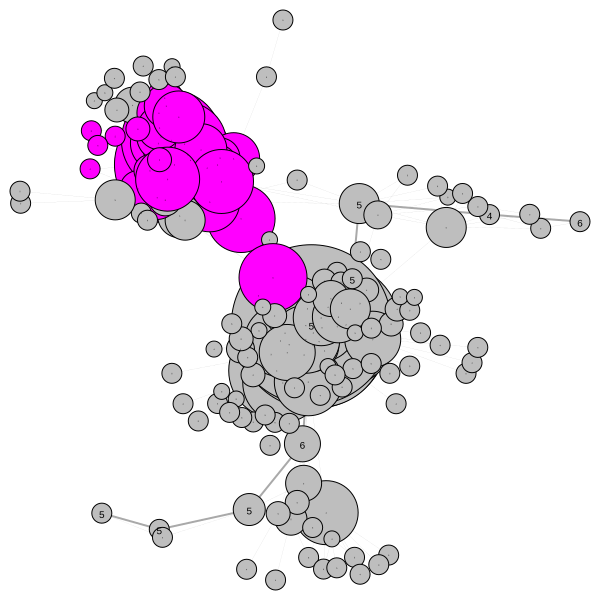

In [25]:
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [4*degree if degree>3 else 20 for degree in g.degree()]

#COLOR NEAREST NEIGHBORS OF A CERTAIN NODE
node_name = "Jon"
for node in nodes:
    if node["Label"] == node_name:
        node_index = node.index

neighbors = g.neighborhood(nodes[node_index],order=1)
visual_style["vertex_color"] = ["fuchsia" if node.index in neighbors else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

ig.plot(g, **visual_style)

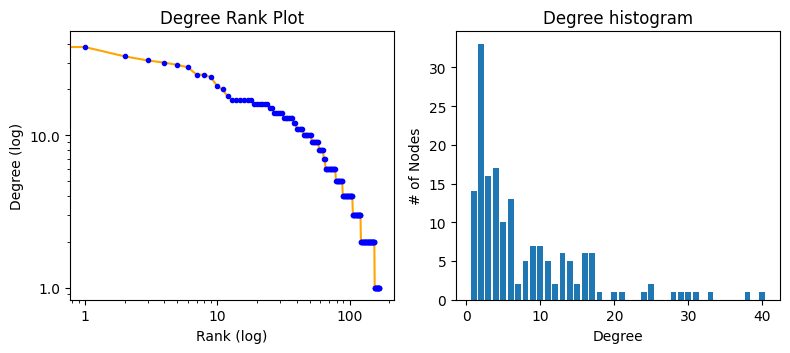

In [26]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank (log)")
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


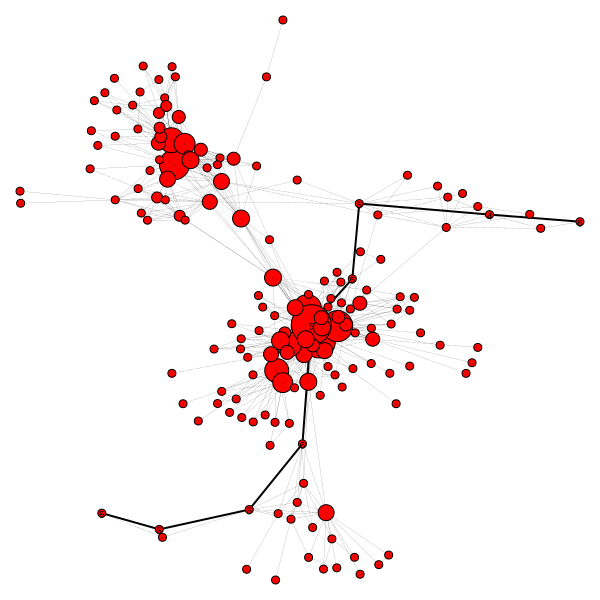

In [27]:
visual_style["vertex_size"] = [degree if degree>10 else 8 for degree in g.degree()]
visual_style['edge_color'] = 'black'
visual_style['vertex_color'] = 'red'
ig.plot(g, **visual_style)

### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [28]:
bridges = g.bridges()

if bridges:
    print("The network has bridges.")
    bridge_labels = [(g.vs[g.es[bridge].source]["Label"], g.vs[g.es[bridge].target]["Label"]) for bridge in bridges]
    print("The bridges are:", bridge_labels)
else:
    print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))

The network has bridges.
The bridges are: [('Arya', 'Ternesio Terys'), ('Arya', 'Jaqen'), ('Jaime', 'Boros'), ('Tyrion', 'Orson'), ('Daenerys', 'Viserys'), ('Sansa', 'Waymar Royce'), ('Sam', 'Randyll'), ('Bronn', 'Falyse'), ('Brienne', 'Selwyn'), ('Joffrey', 'Renly'), ('Missandei', 'Zala'), ('Davos', 'Salladhor'), ('Olenna', 'Musician'), ('Salladhor', 'Lhara'), ('Goatherd', "Goatherd's Son")]
Number of bridges: 15


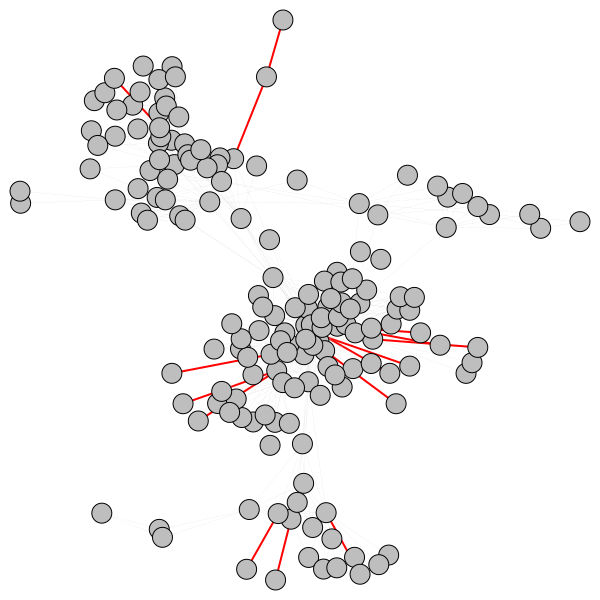

In [29]:
visual_style = {}

bridges_index = g.bridges()

visual_style["vertex_color"] = 'grey'
visual_style["edge_color"] = ["red" if edge.index in bridges_index else "grey" for edge in edges]
#visual_style["vertex_label"] = [g.vs[edge.source]["Label"] for edge in edges]
visual_style["edge_width"] = [2 if edge.index in bridges_index else 0.1 for edge in edges]
#visual_style["vertex_label_size"] = [10 if edge.index in bridges_index else 2 for edge in edges]

ig.plot(g, **visual_style)

### Giant Components



In [30]:
clusters = g.connected_components()
clusters = sorted(clusters, key=len, reverse=True)

# Get the largest connected component
largest_cc = clusters[0]
G0 = g.subgraph(largest_cc)

# Check if the original graph is isomorphic to the largest connected component
if g.isomorphic(G0):
    print("This network is connected and there are no isolated nodes")
else:
    print("This network has", len(clusters), "components")

This network is connected and there are no isolated nodes


### Centrality

In [31]:
# Degree Centrality
degree_cen = nx.degree_centrality(G)

# Weighted degree centrality
weighted_degree_cen = {node: sum(weight for _, _, weight in G.edges(node, data='Weight')) for node in G.nodes()}
# Normalize the weighted degree centrality
max_weighted_degree = max(weighted_degree_cen.values())
weighted_degree_cen = {node: centrality / max_weighted_degree for node, centrality in weighted_degree_cen.items()}

clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
har_cen = nx.harmonic_centrality(G)
pagerank_cen = nx.pagerank(G)

centrality_df = pd.DataFrame(data={
    'Node': list(bet_cen.keys()),
    'Betweenness centrality': list(bet_cen.values()),
    'Closeness centrality': list(clo_cen.values()),
    'Eigenvector centrality': list(eig_cen.values()),
    'Harmonic centrality': [1/x for x in har_cen.values()],
    'Degree centrality': list(degree_cen.values()),
    'Weighted degree centrality': list(weighted_degree_cen.values()),
    'PageRank centrality': list(pagerank_cen.values())
})

centrality_df



Node  Betweenness centrality  Closeness centrality  \
0            ARYA                0.099856              0.384439   
1           HOUND                0.053397              0.360515   
2           JAIME                0.079395              0.435233   
3          TYRION                0.094245              0.413793   
4          CERSEI                0.076365              0.416873   
..            ...                     ...                   ...   
164      MUSICIAN                0.000000              0.255708   
165          ORYS                0.000000              0.292174   
166  ORYS_BROTHER                0.000000              0.292174   
167       RANDYLL                0.000000              0.253776   
168  WAYMAR_ROYCE                0.000000              0.291667   

     Eigenvector centrality  Harmonic centrality  Degree centrality  \
0                  0.107720             0.018744           0.142857   
1                  0.081516             0.021019           0.119048   
2                  0.253863             0.019087           0.172619   
3                  0.287560             0.017323           0.226190   
4                  0.270265             0.015719           0.196429   
..                      ...                  ...                ...   
164                0.008560             0.022599           0.005952   
165                0.014832             0.016755           0.011905   
166                0.014832             0.018530           0.011905   
167                0.000945             0.014164           0.005952   
168                0.015119             0.020168           0.005952   

     Weighted degree centrality  PageRank centrality  
0                      0.348174             0.019757  
1                      0.339041             0.016345  
2                      0.682648             0.018014  
3                      1.000000             0.023507  
4                      0.706621             0.020042  
..                          ...                  ...  
164                    0.002283             0.001500  
165                    0.004566             0.002462  
166                    0.004566             0.002462  
167                    0.002283             0.001424  
168                    0.002283             0.001403  

[169 rows x 8 columns]

In [32]:
print("Mean values of Centralities:")
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))
print("Weighted Degree:", np.mean(list(weighted_degree_cen.values())))
print("PageRank:", np.mean(list(pagerank_cen.values())))

Mean values of Centralities:
Betweenness: 0.014802601053176826
Closeness: 0.2967975689017217
Eigenvector: 0.0407615938742678
Harmonic: 0.017377385748829924
Degree: 0.046773739081431384
Weighted Degree: 0.09443138526384047
PageRank: 0.0059171597633136085


In [33]:
def highest_centrality(centrality_dict):
    # Sort items by centrality score in descending order and return the top one
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[0]

def k_highest_centrality(centrality_dict, k):
    # Sort items by centrality score in descending order and return the top k
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[:k]

In [34]:
highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = zip(*highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = zip(*highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = zip(*highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = zip(*highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = zip(*highest_centrality_degree_cen)

highest_centrality_weighted_degree_cen = k_highest_centrality(weighted_degree_cen, 5)
weighted_degree_cen_char, weighted_degree_cen_scores = zip(*highest_centrality_weighted_degree_cen)

highest_centrality_pagerank_cen = k_highest_centrality(pagerank_cen, 5)
pagerank_cen_char, pagerank_cen_scores = zip(*highest_centrality_pagerank_cen)

# Update the DataFrame to display the top 5 most central nodes for each measure correctly
centrality_df = pd.DataFrame(data={
    'Most central character - Betweenness': bet_cen_char,
    'Score - Betweenness': bet_cen_scores,
    'Most central character - Closeness': clo_cen_char,
    'Score - Closeness': clo_cen_scores,
    'Most central character - Eigenvector': eig_cen_char,
    'Score - Eigenvector': eig_cen_scores,
    'Most central character - Harmonic': har_cen_char,
    'Score - Harmonic': [1/x for x in har_cen_scores],
    'Most central character - Degree': degree_cen_char,
    'Score - Degree': degree_cen_scores,
    'Most central character - Weighted Degree': weighted_degree_cen_char,
    'Score - Weighted Degree': weighted_degree_cen_scores,
    'Most central character - PageRank': pagerank_cen_char,
    'Score - PageRank': pagerank_cen_scores
})


centrality_df

Most central character - Betweenness  Score - Betweenness  \
0                              JOFFREY             0.212174   
1                                  NED             0.200773   
2                              STANNIS             0.184341   
3                                  JON             0.150837   
4                                VARYS             0.112189   

  Most central character - Closeness  Score - Closeness  \
0                            JOFFREY           0.460274   
1                              JAIME           0.435233   
2                                NED           0.427481   
3                             CERSEI           0.416873   
4                             TYRION           0.413793   

  Most central character - Eigenvector  Score - Eigenvector  \
0                              JOFFREY             0.294165   
1                               TYRION             0.287560   
2                               CERSEI             0.270265   
3                                SANSA             0.258949   
4                                JAIME             0.253863   

  Most central character - Harmonic  Score - Harmonic  \
0                           JOFFREY          0.010733   
1                            TYRION          0.011507   
2                             JAIME          0.011567   
3                            CERSEI          0.011726   
4                             SANSA          0.011848   

  Most central character - Degree  Score - Degree  \
0                         JOFFREY        0.238095   
1                          TYRION        0.226190   
2                          CERSEI        0.196429   
3                           SANSA        0.184524   
4                             JON        0.178571   

  Most central character - Weighted Degree  Score - Weighted Degree  \
0                                   TYRION                 1.000000   
1                                   CERSEI                 0.706621   
2                                    JAIME                 0.682648   
3                                    TYWIN                 0.668950   
4                                      JON                 0.618721   

  Most central character - PageRank  Score - PageRank  
0                           JOFFREY          0.024758  
1                            TYRION          0.023507  
2                            CERSEI          0.020042  
3                              ARYA          0.019757  
4                             SANSA          0.018806

### Homophily

In [35]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

Degree assortativity coefficient: -0.08227470375131578


In [36]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node      Second node     Score
546  MELISANDRE           SELYSE  0.818182
478       MEERA            HODOR  0.750000
411       GRENN  EDDISON_TOLLETT  0.727273
550      SELYSE          SHIREEN  0.727273
547  MELISANDRE          SHIREEN  0.727273
..          ...              ...       ...
295       BRONN           FALYSE  0.000000
398      RAMSAY             ROBB  0.000000
154    DAENERYS          VISERYS  0.000000
499      OLENNA         MUSICIAN  0.000000
370     JOFFREY            RENLY  0.000000

[664 rows x 3 columns]

### Triangles

In [37]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

List of all the edges involved in the traingles


[('ARYA', 'HOUND', 'BRIENNE'),
 ('ARYA', 'HOUND', 'POLLIVER'),
 ('ARYA', 'HOUND', 'FARMER_HAMLET'),
 ('ARYA', 'HOUND', 'DYING_MAN'),
 ('ARYA', 'HOUND', 'SALLY'),
 ('ARYA', 'HOUND', 'RORGE'),
 ('ARYA', 'HOUND', 'JOFFREY'),
 ('ARYA', 'HOUND', 'PODRICK'),
 ('ARYA', 'HOUND', 'DONNEL_WAYNWOOD'),
 ('ARYA', 'HOUND', 'INNKEEPER'),
 ('ARYA', 'HOUND', 'INNKEEPERS_DAUGHTER'),
 ('ARYA', 'HOUND', 'LOMMY'),
 ('ARYA', 'HOUND', 'LYSA'),
 ('ARYA', 'HOUND', 'MERYN_TRANT'),
 ('ARYA', 'HOUND', 'SYRIO_FOREL'),
 ('ARYA', 'HOUND', 'TOMMY'),
 ('ARYA', 'BRIENNE', 'CATELYN'),
 ('ARYA', 'BRIENNE', 'HOT_PIE'),
 ('ARYA', 'BRIENNE', 'JOFFREY'),
 ('ARYA', 'BRIENNE', 'NED'),
 ('ARYA', 'BRIENNE', 'PODRICK'),
 ('ARYA', 'BRIENNE', 'SANSA'),
 ('ARYA', 'BRIENNE', 'JAIME'),
 ('ARYA', 'POLLIVER', 'JOFFREY'),
 ('ARYA', 'POLLIVER', 'INNKEEPER'),
 ('ARYA', 'POLLIVER', 'TOMMY'),
 ('ARYA', 'FARMER_HAMLET', 'SALLY'),
 ('ARYA', 'CATELYN', 'JOFFREY'),
 ('ARYA', 'CATELYN', 'NED'),
 ('ARYA', 'CATELYN', 'SANSA')]

In [38]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

Character  # of triangles in which they are involved
20   JOFFREY                                        199
3     TYRION                                        186
4     CERSEI                                        168
9      SANSA                                        163
2      JAIME                                        151
7      TYWIN                                        136
16    OBERYN                                        126
10       JON                                        114
61      MACE                                        100
11       SAM                                         99

In [39]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

There are 1368 triangles


Investigating interesting character triangles

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig


community_graph_layout_gn = nx.spring_layout(G)


default_node_color = "lightgrey"
default_edge_color = "grey"


node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())


edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())


edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Find all triangles in the graph
triangles = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

# Compute the strengths and max edge weights of all triangles
triangle_strengths_and_max_edges = []
for triangle in triangles:
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

# Sort triangles by strength in descending order and select the top 10
top_triangles = sorted(triangle_strengths_and_max_edges, key=lambda x: x[1], reverse=True)[:70]

# Highlight the nodes and edges in the top 10 triangles
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    color = "Crimson"  # Use a single color for all top triangles or set a different color if needed
    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles


for triangle, strength, max_edge_weight, max_edge in top_triangles:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

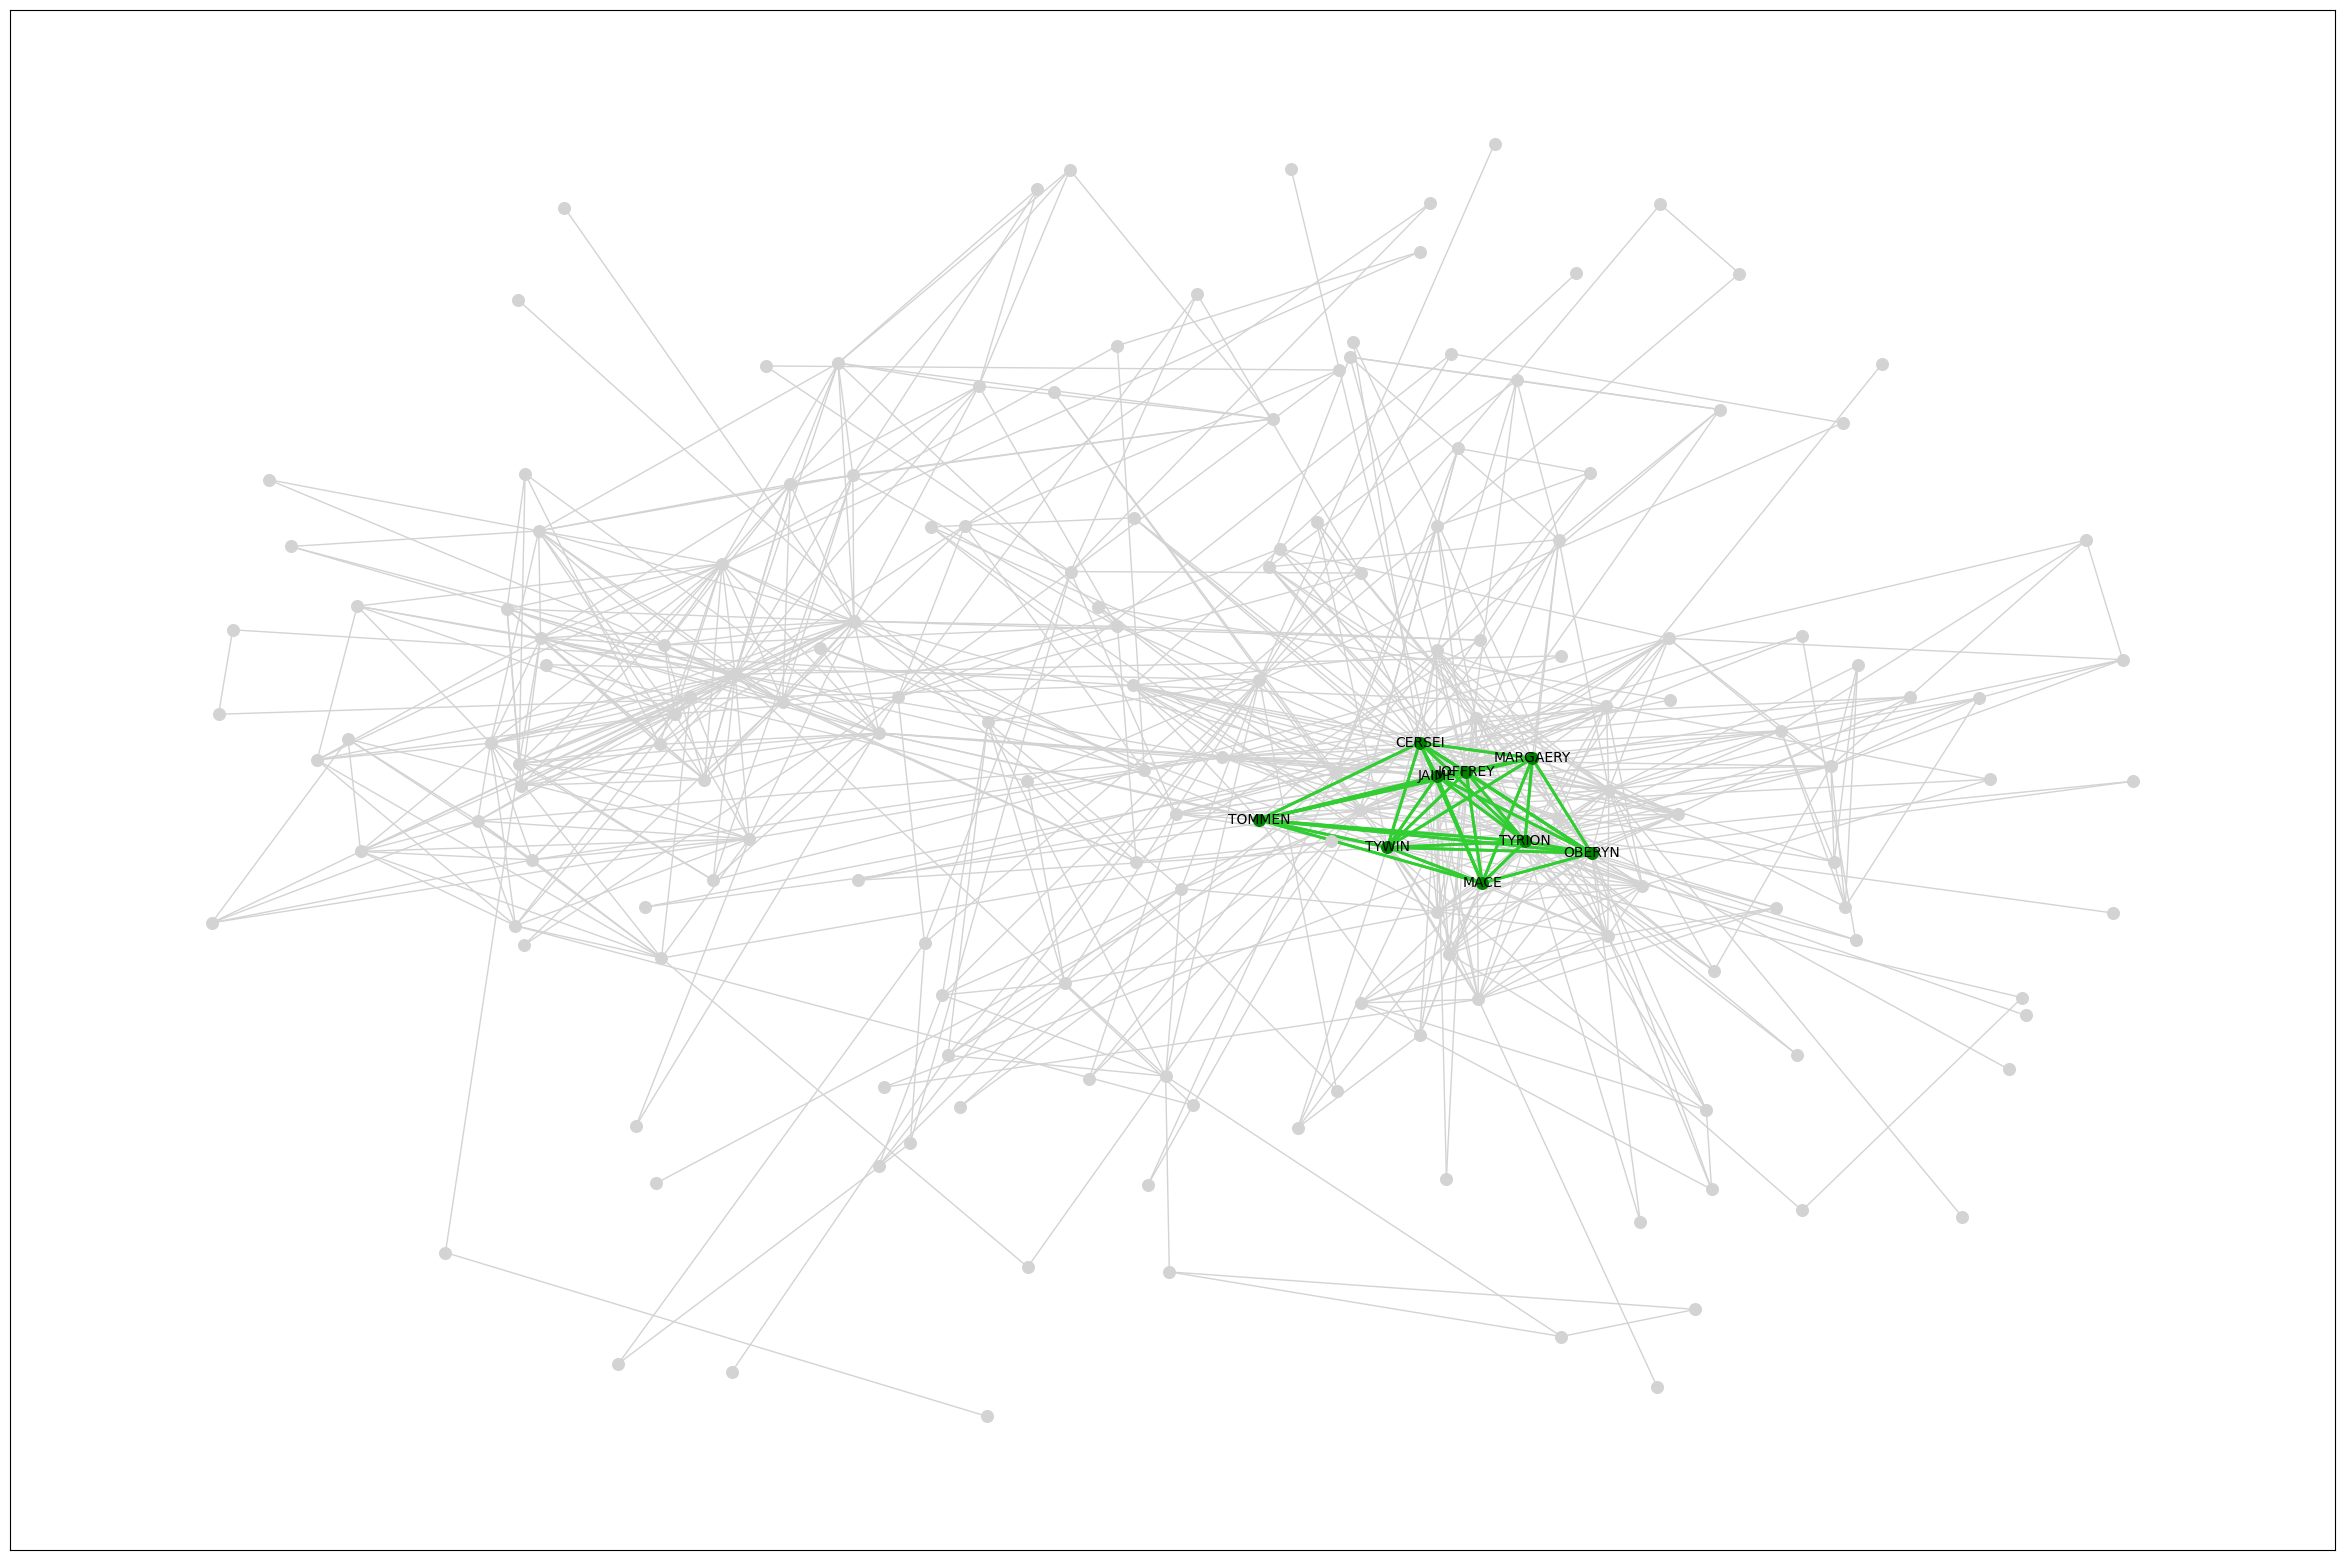

In [41]:
cliques = nx.find_cliques(G)
cliques_list = list(cliques)
#for item in cliques_list:
#  print(item)

clique = ['JOFFREY', 'TYRION', 'CERSEI', 'JAIME', 'TYWIN', 'MACE', 'OBERYN', 'MARGAERY', 'TOMMEN']


plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_color='LightGrey', node_size=70)
nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color='Green', node_size=70)
nx.draw_networkx_edges(G, pos, edge_color='LightGrey')

# Draw edges for the clique
clique_edges = [(u, v) for u in clique for v in clique if G.has_edge(u, v)]
nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='LimeGreen', width=2)
nx.draw_networkx_labels(G, pos, labels={node: node for node in clique}, font_size=10)


plt.show()


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig


highlighted_triangles = [
    (('ARYA', 'HOUND', 'BRIENNE'), "MistyRose"),
    (('JAIME', 'TYRION', 'TYWIN'), "Red"),
    (('JAIME', 'TYRION', 'CERSEI'), "Yellow"),
    (('TYRION', 'TYWIN', 'OBERYN'), "Orange"),
    (('JAIME', 'CERSEI', 'TYWIN'), "LimeGreen"),
    (('TYRION', 'CERSEI', 'JOFFREY'), "HotPink"),
    (('CERSEI', 'JOFFREY', 'MARGAERY'), "DarkRed"),
    (('LITTLEFINGER', 'SANSA', 'LYSA'), "LightBlue"),
    (('DAENERYS', 'JORAH', 'MISSANDEI'), "Gold"),
]


community_graph_layout_gn = nx.spring_layout(G)


default_node_color = "lightgrey"
default_edge_color = "grey"


node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())


edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles


for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

Specifically about a character

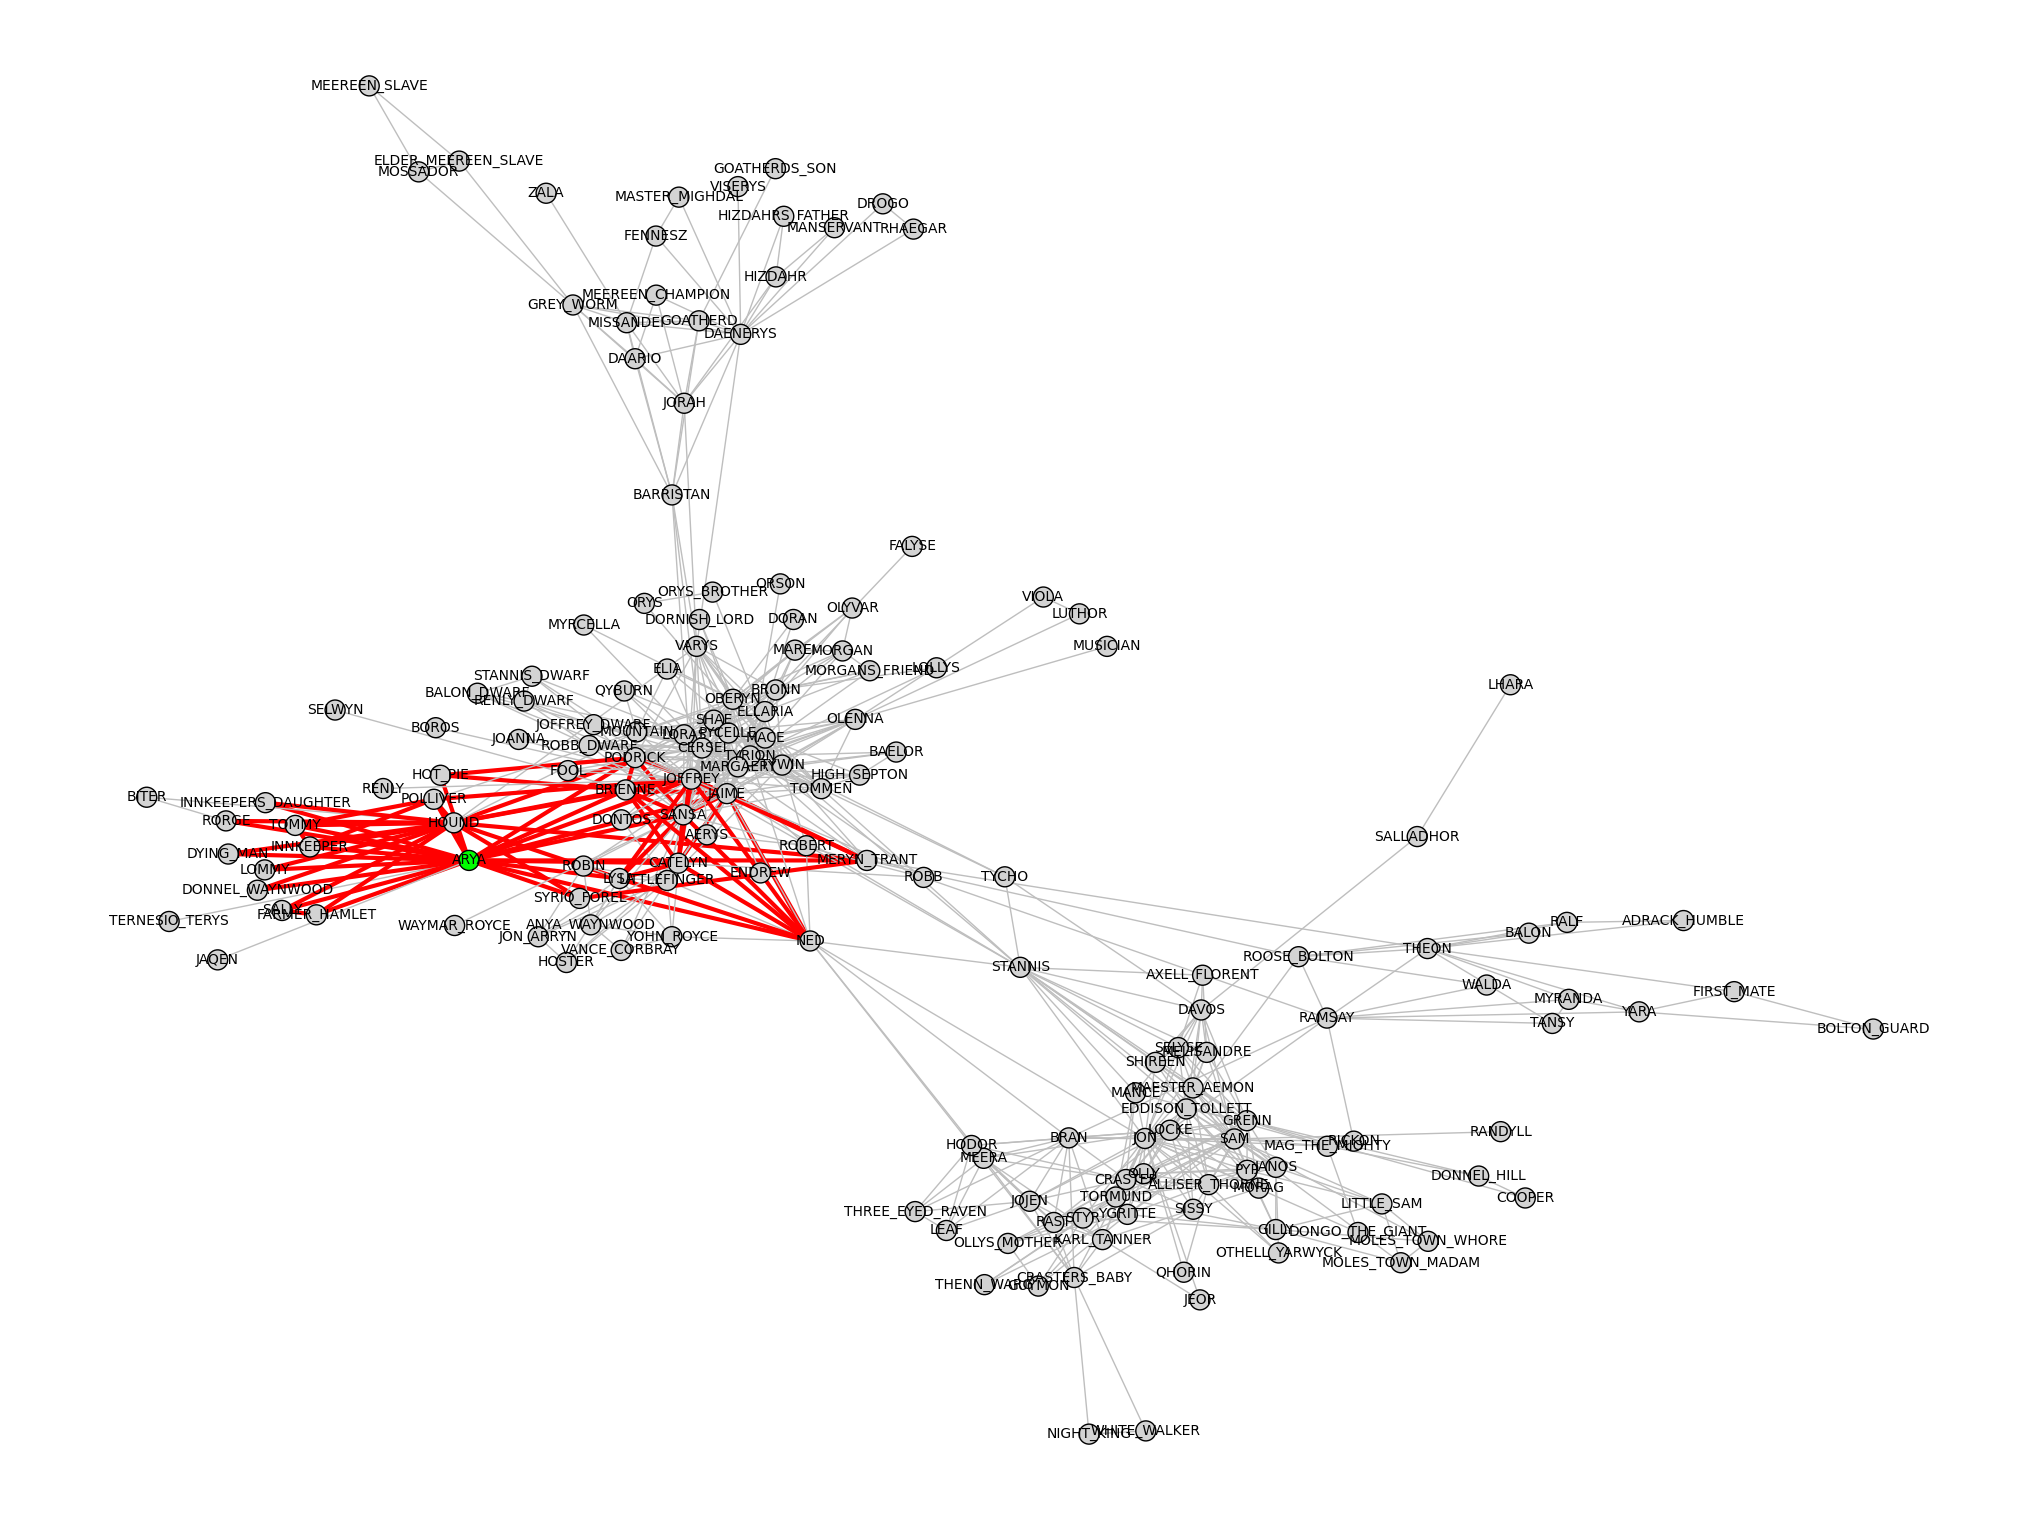

In [43]:
highlight_node = "ARYA"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles


community_graph_layout_gn = nx.spring_layout(G)


node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)


for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()


g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())


fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

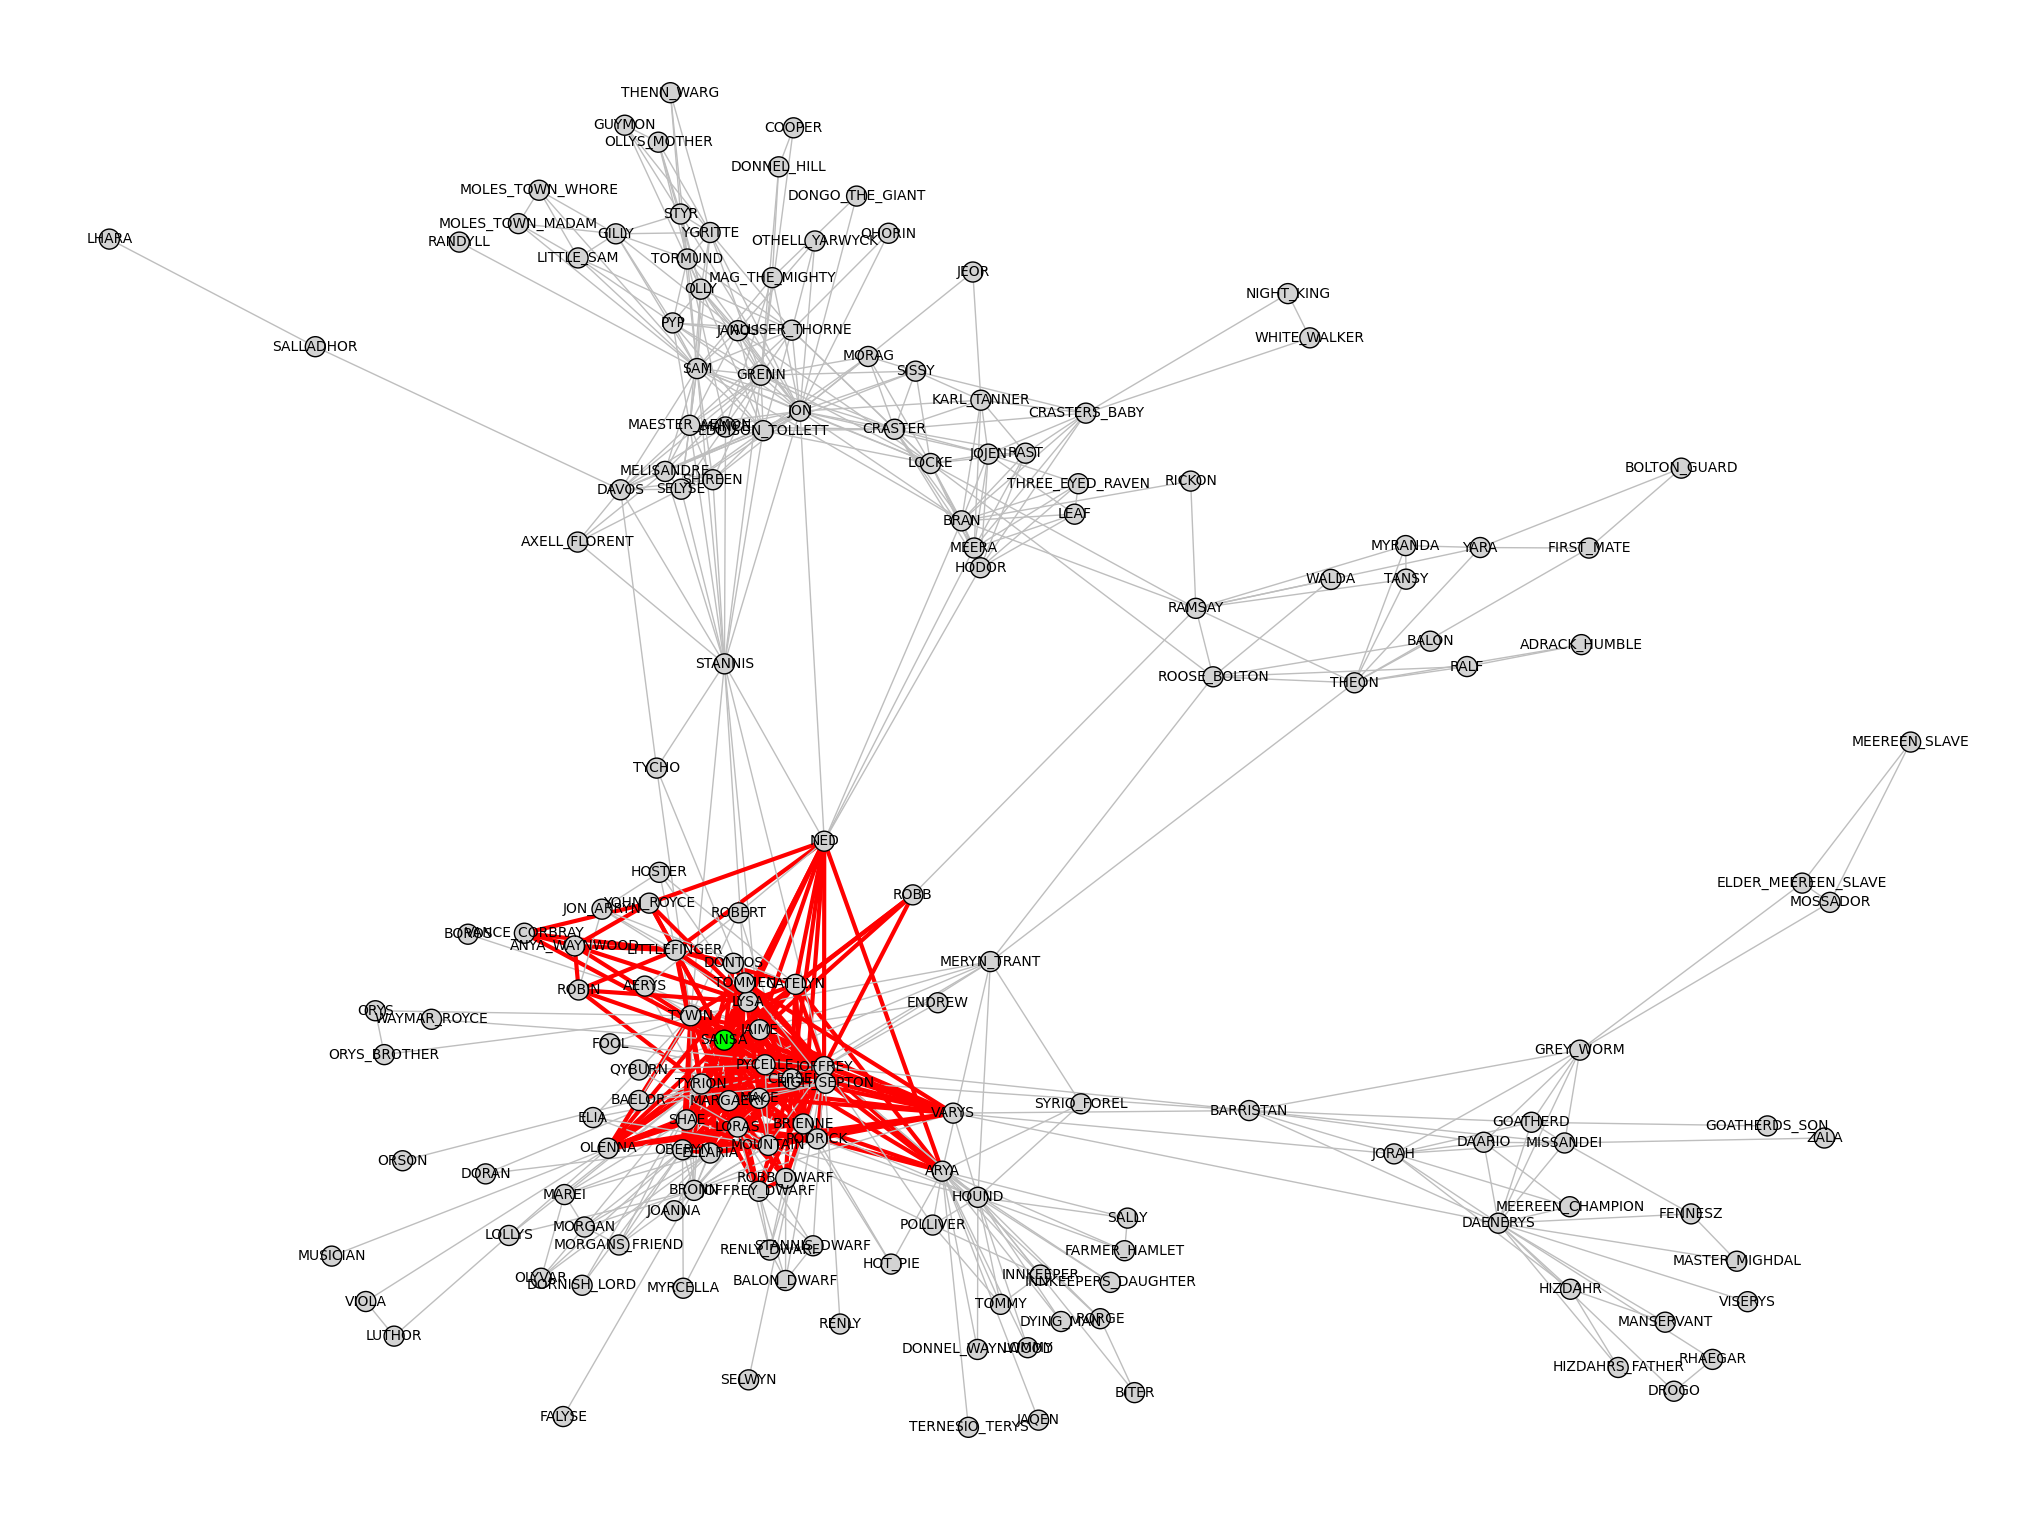

In [44]:
highlight_node = "SANSA"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles


community_graph_layout_gn = nx.spring_layout(G)


node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")


edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)


for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()


g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())


fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [45]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

Global clustering coefficient (Triadic Closure) 0.4353452848201973


In [46]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node Arya : 0.17753623188405795
   Local clustering coefficient of node Sandor : 0.16842105263157894
   Local clustering coefficient of node Jaime : 0.37192118226600984
   Local clustering coefficient of node Tyrion : 0.26458036984352773
   Local clustering coefficient of node Cersei : 0.3181818181818182
   Local clustering coefficient of node Daenerys : 0.2
   Local clustering coefficient of node Jorah : 0.5277777777777778
   Local clustering coefficient of node Tywin : 0.35978835978835977
   Local clustering coefficient of node Petyr : 0.43956043956043955
   Local clustering coefficient of node Sansa : 0.35053763440860214
   Local clustering coefficient of node Jon : 0.26206896551724135
   Local clustering coefficient of node Sam : 0.33
   Local clustering coefficient of node Lysa : 0.4743589743589744
   Local clustering coefficient of node Bronn : 0.49523809523809526
   Local clustering coefficient of node Podrick : 0.6

In [47]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))


Average clustering component 0.6665100417033084


## Communities

In [48]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "GENDRY"
node2 = "STANNIS"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

There is no edge between 'GENDRY' and 'STANNIS'.


### Infomap

In [49]:
infomap = g.community_infomap()

In [50]:
infomap_comm = infomap.membership

# Create a dictionary to hold clusters
clusters = {}

# Group nodes into clusters based on their community membership
for i, node in enumerate(G.nodes()):
    community = infomap_comm[i]
    if community not in clusters:
        clusters[community] = []
    clusters[community].append(node)

# Convert the clusters dictionary to a list of clusters
infomap_comm = [clusters[community] for community in sorted(clusters)]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

Number of communities detected: 11


In [51]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")

# Cluster 1: The Riverlands
# Cluster 2: King's Landing (Sansa during S4 is in King's Landing and then flees to the Eyrie)
# Cluster 3: Daenerys in Meereen (Cluster 9 is aggregable to Cluster 3)
# Cluster 4: Castle Black and Mole's Town (Jon and Sam) + Dragonstone (Stannis)
# Cluster 5: Winterfell
# Cluster 6: Beyond the Wall
# Cluster 7: The Eyrie
# Clusters 8-10: unrelated, although cluster 9 has 3 characters from Meereen (should be in Cluster 3)

List of Characters by Community
Cluster 1: ['ARYA', 'HOUND', 'POLLIVER', 'FARMER_HAMLET', 'TERNESIO_TERYS', 'DYING_MAN', 'SALLY', 'RORGE', 'MERYN_TRANT', 'DONNEL_WAYNWOOD', 'INNKEEPER', 'SYRIO_FOREL', 'INNKEEPERS_DAUGHTER', 'JAQEN', 'LOMMY', 'TOMMY', 'BITER']
Cluster 2: ['JAIME', 'TYRION', 'CERSEI', 'TYWIN', 'SANSA', 'BRONN', 'PODRICK', 'OBERYN', 'BRIENNE', 'SHAE', 'JOFFREY', 'ELLARIA', 'MARGAERY', 'OLENNA', 'TOMMEN', 'VARYS', 'DONTOS', 'PYCELLE', 'HOT_PIE', 'MACE', 'OLYVAR', 'QYBURN', 'MORGAN', 'MOUNTAIN', 'ELIA', 'LORAS', 'MORGANS_FRIEND', 'MAREI', 'BALON_DWARF', 'ROBB_DWARF', 'DORNISH_LORD', 'ENDREW', 'RENLY_DWARF', 'STANNIS_DWARF', 'MYRCELLA', 'JOFFREY_DWARF', 'ORSON', 'HIGH_SEPTON', 'AERYS', 'ROBERT', 'ROBB', 'BAELOR', 'SELWYN', 'LOLLYS', 'DORAN', 'RENLY', 'BOROS', 'FALYSE', 'FOOL', 'JOANNA', 'MUSICIAN', 'WAYMAR_ROYCE']
Cluster 3: ['DAENERYS', 'JORAH', 'MISSANDEI', 'DAARIO', 'GREY_WORM', 'BARRISTAN', 'HIZDAHR', 'FENNESZ', 'MEEREEN_CHAMPION', 'HIZDAHRS_FATHER', 'GOATHERD', 'MASTER_

In [52]:
#community_graph_layout_infomap = nx.spring_layout(G, k=2/np.sqrt(len(G.nodes())))
community_graph_layout_infomap = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]


node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_infomap
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]



fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)




Output hidden; open in https://colab.research.google.com to view.

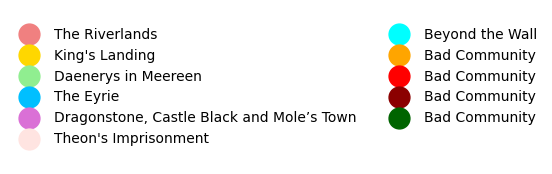

In [53]:
fig_legend, ax_legend = plt.subplots(figsize=(2,2))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Riverlands")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys in Meereen")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The Eyrie")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Dragonstone, Castle Black and Mole’s Town")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Beyond the Wall")
ax_legend.plot([], [], color="Orange", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="Red", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DarkRed", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DarkGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [54]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

The Modularity for the Infomap Method is 0.6


### Girvan-Newman

In [55]:
#compute girvan newman communities
from networkx.algorithms import community
com_gn = community.girvan_newman(G)

# To get the communities at different levels
levels = []
desired_number_of_communities = 5 # > 5 doesn't yield any better results
for communities in com_gn:
    levels.append(communities)
    if len(communities) >= desired_number_of_communities:
        break

# The last entry in levels contains the desired number of communities
g_n_comm = [sorted(list(c)) for c in levels[-1]]
n_comm_g_n = len(g_n_comm)
print("Number of communities detected:", n_comm_g_n)
print("Communities:", g_n_comm)




Number of communities detected: 5
Communities: [['ARYA', 'BITER', 'DONNEL_WAYNWOOD', 'DYING_MAN', 'FARMER_HAMLET', 'HOUND', 'INNKEEPER', 'INNKEEPERS_DAUGHTER', 'JAQEN', 'LOMMY', 'POLLIVER', 'RORGE', 'SALLY', 'SYRIO_FOREL', 'TERNESIO_TERYS', 'TOMMY'], ['AERYS', 'ANYA_WAYNWOOD', 'BAELOR', 'BALON_DWARF', 'BOROS', 'BRIENNE', 'BRONN', 'CATELYN', 'CERSEI', 'DONTOS', 'DORAN', 'DORNISH_LORD', 'ELIA', 'ELLARIA', 'ENDREW', 'FALYSE', 'FOOL', 'HIGH_SEPTON', 'HOSTER', 'HOT_PIE', 'JAIME', 'JOANNA', 'JOFFREY', 'JOFFREY_DWARF', 'JON_ARRYN', 'LITTLEFINGER', 'LOLLYS', 'LORAS', 'LUTHOR', 'LYSA', 'MACE', 'MAREI', 'MARGAERY', 'MERYN_TRANT', 'MORGAN', 'MORGANS_FRIEND', 'MOUNTAIN', 'MUSICIAN', 'MYRCELLA', 'NED', 'OBERYN', 'OLENNA', 'OLYVAR', 'ORSON', 'ORYS', 'ORYS_BROTHER', 'PODRICK', 'PYCELLE', 'QYBURN', 'RENLY', 'RENLY_DWARF', 'ROBB', 'ROBB_DWARF', 'ROBERT', 'ROBIN', 'SANSA', 'SELWYN', 'SHAE', 'STANNIS_DWARF', 'TOMMEN', 'TYRION', 'TYWIN', 'VANCE_CORBRAY', 'VARYS', 'VIOLA', 'WAYMAR_ROYCE', 'YOHN_ROYCE'], ['

In [56]:
# Print each community list
print("List of the characters, divided per communities:")
for idx, community in enumerate(g_n_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: ['ARYA', 'BITER', 'DONNEL_WAYNWOOD', 'DYING_MAN', 'FARMER_HAMLET', 'HOUND', 'INNKEEPER', 'INNKEEPERS_DAUGHTER', 'JAQEN', 'LOMMY', 'POLLIVER', 'RORGE', 'SALLY', 'SYRIO_FOREL', 'TERNESIO_TERYS', 'TOMMY']
Cluster 2: ['AERYS', 'ANYA_WAYNWOOD', 'BAELOR', 'BALON_DWARF', 'BOROS', 'BRIENNE', 'BRONN', 'CATELYN', 'CERSEI', 'DONTOS', 'DORAN', 'DORNISH_LORD', 'ELIA', 'ELLARIA', 'ENDREW', 'FALYSE', 'FOOL', 'HIGH_SEPTON', 'HOSTER', 'HOT_PIE', 'JAIME', 'JOANNA', 'JOFFREY', 'JOFFREY_DWARF', 'JON_ARRYN', 'LITTLEFINGER', 'LOLLYS', 'LORAS', 'LUTHOR', 'LYSA', 'MACE', 'MAREI', 'MARGAERY', 'MERYN_TRANT', 'MORGAN', 'MORGANS_FRIEND', 'MOUNTAIN', 'MUSICIAN', 'MYRCELLA', 'NED', 'OBERYN', 'OLENNA', 'OLYVAR', 'ORSON', 'ORYS', 'ORYS_BROTHER', 'PODRICK', 'PYCELLE', 'QYBURN', 'RENLY', 'RENLY_DWARF', 'ROBB', 'ROBB_DWARF', 'ROBERT', 'ROBIN', 'SANSA', 'SELWYN', 'SHAE', 'STANNIS_DWARF', 'TOMMEN', 'TYRION', 'TYWIN', 'VANCE_CORBRAY', 'VARYS', 'VIOLA', 'WAYMAR_ROY

In [57]:
community_graph_layout_gn = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "LightSalmon", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

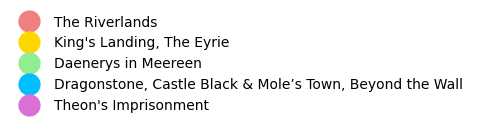

In [58]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Riverlands")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="King's Landing, The Eyrie")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys in Meereen")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Dragonstone, Castle Black & Mole’s Town, Beyond the Wall")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")

ax_legend.legend(loc='center', frameon=False, ncol=1)
ax_legend.axis('off')

plt.show()

In [59]:
def convertInLabelArray_communities(G, list_of_communities):
    # Initialize the label array with a default value that indicates no community found
    d = []
    num_communities = len(list_of_communities)

    # Create a dictionary to map each node to its community label
    node_to_community = {}
    for community_label, community in enumerate(list_of_communities):
        for node in community:
            node_to_community[node] = community_label

    # Populate the label array based on the node's community
    for node in G.nodes():
        if node in node_to_community:
            d.append(node_to_community[node])
        else:
            d.append(num_communities)  # Assign a label for nodes not in any community

    d = np.array(d)
    return d

In [60]:
#modularity
#modularity = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G, next(com))), 3)

modularity_g_n = round(nx.community.modularity(G, next(com_gn)),3)

print("The Modularity for the Girvan-Newman Nethod is", modularity_g_n)

The Modularity for the Girvan-Newman Nethod is 0.573


### Louvain

In [61]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

Number of communities detected: 7


In [62]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

List of the characters, divided per communities:
Community 1: {'INNKEEPER', 'MERYN_TRANT', 'TOMMY', 'INNKEEPERS_DAUGHTER', 'DYING_MAN', 'SALLY', 'POLLIVER', 'DONNEL_WAYNWOOD', 'SYRIO_FOREL', 'ARYA', 'RORGE', 'TERNESIO_TERYS', 'FARMER_HAMLET', 'HOUND', 'JAQEN', 'LOMMY', 'BITER'}
Community 2: {'FIRST_MATE', 'YARA', 'ROOSE_BOLTON', 'WALDA', 'THEON', 'BALON', 'MYRANDA', 'RAMSAY', 'TANSY', 'RICKON', 'BOLTON_GUARD', 'ADRACK_HUMBLE', 'RALF'}
Community 3: {'LEAF', 'JOJEN', 'WHITE_WALKER', 'HODOR', 'KARL_TANNER', 'MEERA', 'JEOR', 'RAST', 'CRASTERS_BABY', 'NIGHT_KING', 'CRASTER', 'BRAN', 'THREE_EYED_RAVEN'}
Community 4: {'SAM', 'COOPER', 'AXELL_FLORENT', 'JON', 'OTHELL_YARWYCK', 'OLLY', 'GUYMON', 'YGRITTE', 'DAVOS', 'TYCHO', 'MOLES_TOWN_MADAM', 'SALLADHOR', 'MANCE', 'MAESTER_AEMON', 'GILLY', 'OLLYS_MOTHER', 'STANNIS', 'STYR', 'DONGO_THE_GIANT', 'SISSY', 'MORAG', 'JANOS', 'EDDISON_TOLLETT', 'SELYSE', 'TORMUND', 'THENN_WARG', 'PYP', 'ALLISER_THORNE', 'LOCKE', 'DONNEL_HILL', 'QHORIN', 'MELISANDRE',

In [63]:
community_graph_layout_louvain = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(louvain_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_louvain
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]



fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

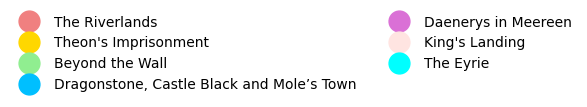

In [64]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Riverlands")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Beyond the Wall")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Dragonstone, Castle Black and Mole’s Town")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Daenerys in Meereen")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="The Eyrie")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [65]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

The Modularity for the Louvain Method is 0.6


### Greedy Modularity Maximization

In [66]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

The number of communities detected are: 4


In [67]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: frozenset({'ROBIN', 'ORSON', 'BAELOR', 'MAREI', 'HIGH_SEPTON', 'SANSA', 'VIOLA', 'ROBB', 'VARYS', 'MORGANS_FRIEND', 'JOFFREY_DWARF', 'MACE', 'HOT_PIE', 'LOLLYS', 'ELLARIA', 'POLLIVER', 'MOUNTAIN', 'ARYA', 'RORGE', 'DORNISH_LORD', 'OBERYN', 'CATELYN', 'OLENNA', 'JAQEN', 'LORAS', 'NED', 'LOMMY', 'HOSTER', 'ENDREW', 'BRONN', 'PYCELLE', 'JON_ARRYN', 'TYWIN', 'OLYVAR', 'DONTOS', 'SHAE', 'INNKEEPERS_DAUGHTER', 'JOANNA', 'DONNEL_WAYNWOOD', 'AERYS', 'JAIME', 'PODRICK', 'TYRION', 'LITTLEFINGER', 'TERNESIO_TERYS', 'BRIENNE', 'BITER', 'FARMER_HAMLET', 'MYRCELLA', 'ROBERT', 'RENLY', 'HOUND', 'JOFFREY', 'DORAN', 'BOROS', 'VANCE_CORBRAY', 'INNKEEPER', 'LUTHOR', 'SELWYN', 'YOHN_ROYCE', 'QYBURN', 'MARGAERY', 'WAYMAR_ROYCE', 'FOOL', 'TOMMEN', 'TOMMY', 'DYING_MAN', 'SALLY', 'ELIA', 'ORYS_BROTHER', 'LYSA', 'SYRIO_FOREL', 'MORGAN', 'FALYSE', 'MUSICIAN', 'ROBB_DWARF', 'BALON_DWARF', 'STANNIS_DWARF', 'ORYS', 'CERSEI', 'RENLY_DWARF', 'ANYA_WAYNWOOD'

In [68]:
community_graph_layout_gmm = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]



fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

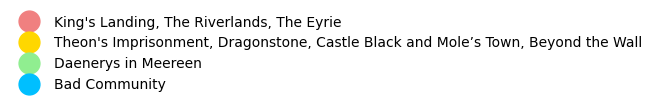

In [69]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing, The Riverlands, The Eyrie")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment, Dragonstone, Castle Black and Mole’s Town, Beyond the Wall")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys in Meereen")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Bad Community")

ax_legend.legend(loc='center', frameon=False, ncol=1)
ax_legend.axis('off')

plt.show()

In [70]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

The modularity for Greedy Modularity Maximization is 0.514


### Spectral Clustering

In [71]:
from sklearn.cluster import SpectralClustering
adj_matrix = nx.to_numpy_array(G)

num_clusters = 8  # Specify the number of communities
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=30)
labels = spectral_clustering.fit_predict(adj_matrix)

community_dict = {node: labels[i] for i, node in enumerate(G.nodes())}
sc_comm = [[] for _ in range(num_clusters)]
for node, comm in community_dict.items():
  sc_comm[comm].append(node)

n_comm_sc = len(sc_comm)

print(f"Spectral Clustering detected {n_comm_sc} communities")
print("List of the characters, divided per communities:")
for idx, community in enumerate(sc_comm):
    print(f"Cluster {idx + 1}: {community}")

Spectral Clustering detected 8 communities
List of the characters, divided per communities:
Cluster 1: ['ARYA', 'HOUND', 'POLLIVER', 'FARMER_HAMLET', 'TERNESIO_TERYS', 'DYING_MAN', 'SALLY', 'RORGE', 'DONNEL_WAYNWOOD', 'INNKEEPER', 'SYRIO_FOREL', 'INNKEEPERS_DAUGHTER', 'JAQEN', 'LOMMY', 'TOMMY', 'BITER']
Cluster 2: ['JAIME', 'TYRION', 'CERSEI', 'TYWIN', 'LITTLEFINGER', 'SANSA', 'LYSA', 'BRONN', 'PODRICK', 'OBERYN', 'BRIENNE', 'SHAE', 'JOFFREY', 'ELLARIA', 'MARGAERY', 'OLENNA', 'ROBIN', 'TOMMEN', 'VARYS', 'DONTOS', 'YOHN_ROYCE', 'PYCELLE', 'HOT_PIE', 'ANYA_WAYNWOOD', 'MACE', 'OLYVAR', 'QYBURN', 'TYCHO', 'MORGAN', 'MOUNTAIN', 'ELIA', 'LORAS', 'CATELYN', 'MORGANS_FRIEND', 'MAREI', 'BALON_DWARF', 'ROBB_DWARF', 'DORNISH_LORD', 'ENDREW', 'NED', 'RENLY_DWARF', 'STANNIS_DWARF', 'MYRCELLA', 'JOFFREY_DWARF', 'JON_ARRYN', 'MERYN_TRANT', 'ORSON', 'HIGH_SEPTON', 'LUTHOR', 'AERYS', 'ROBERT', 'ROBB', 'BAELOR', 'SELWYN', 'LOLLYS', 'HOSTER', 'DORAN', 'RENLY', 'VANCE_CORBRAY', 'BOROS', 'FALYSE', 'FOOL', 

In [72]:
community_graph_layout = nx.spring_layout(G)


colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(sc_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

ig_G = ig.Graph.Weighted_Adjacency(adj_matrix.tolist(), mode=ig.ADJ_UNDIRECTED)
ig_G.vs["Label"] = list(G.nodes())


positions = community_graph_layout
ig_G.vs["x"] = [positions[node][0] for node in G.nodes()]
ig_G.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(ig_G.vs["x"])-0.05, max(ig_G.vs["x"])+0.05)
ax.set_ylim(min(ig_G.vs["y"])-0.05, max(ig_G.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    ig_G,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=ig_G.vs["Label"],
    vertex_label_size=10,
    edge_color="grey",
    edge_width=[weight * 2 for weight in ig_G.es['weight']]
)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [73]:
modularity_sc = round(nx.community.modularity(G, sc_comm),3)
print("The modularity for Spectral Clustering is", modularity_sc)

The modularity for Spectral Clustering is 0.581


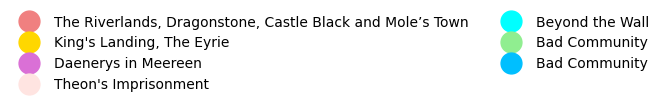

In [74]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Riverlands, Dragonstone, Castle Black and Mole’s Town")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="King's Landing, The Eyrie")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Daenerys in Meereen")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Beyond the Wall")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Bad Community")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

### Comparison

In [75]:
community_methods =[]
community_methods.append("Infomap")
community_methods.append("Louvain")
community_methods.append("Girvan-Newmann")
community_methods.append("Greedy M.M.")
community_methods.append("Spectral Clustering")

methods_modularity = []
methods_modularity.append(modularity_infomap)
methods_modularity.append(modularity_louvain)
methods_modularity.append(modularity_g_n)
methods_modularity.append(modularity_gmm)
methods_modularity.append(modularity_sc)

n_communities = []
n_communities.append(n_comm_infomap)
n_communities.append(n_comm_louvain)
n_communities.append(n_comm_g_n)
n_communities.append(n_comm_gmm)
n_communities.append(n_comm_sc)

print("Comparison between Methods: Number of Communities and Modularity")
print(f"Infomap: {n_communities[0]}  -  {methods_modularity[0]}")
print(f"Louvain: {n_communities[1]}  -  {methods_modularity[1]}")
print(f"Girvan-Newman: {n_communities[2]}  -  {methods_modularity[2]}")
print(f"Greedy Modularity Maximization: {n_communities[3]}  -  {methods_modularity[3]}")
print(f"Spectral Clustring: {n_communities[4]}  -  {methods_modularity[4]}")

Comparison between Methods: Number of Communities and Modularity
Infomap: 11  -  0.6
Louvain: 7  -  0.6
Girvan-Newman: 5  -  0.573
Greedy Modularity Maximization: 4  -  0.514
Spectral Clustring: 8  -  0.581


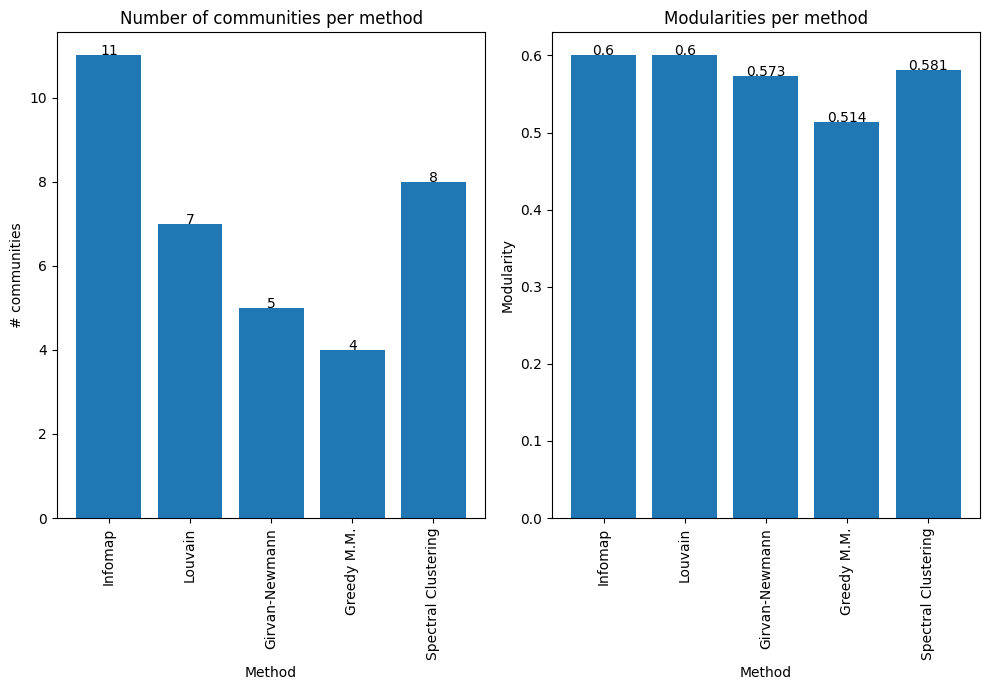

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Number of communities per method
axs[0].bar(community_methods, n_communities)
for i, v in enumerate(n_communities):
    axs[0].text(i, v, str(v), ha='center', color='black')
axs[0].set_xlabel("Method")
axs[0].set_ylabel("# communities")
axs[0].set_title("Number of communities per method")
axs[0].set_xticks(range(len(community_methods)))
axs[0].set_xticklabels(community_methods, rotation='vertical')

# Modularities per method
axs[1].bar(community_methods, methods_modularity)
for i, v in enumerate(methods_modularity):
    axs[1].text(i, v, str(v), ha='center', color='black')
axs[1].set_xlabel("Method")
axs[1].set_ylabel("Modularity")
axs[1].set_title("Modularities per method")
axs[1].set_xticks(range(len(community_methods)))
axs[1].set_xticklabels(community_methods, rotation='vertical')

plt.tight_layout()
plt.show()

## Robustness

### Random Nodes Removal

In [77]:
import random
import numpy as np
import networkx as nx

random_seed = 30
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(list(graph_copy.nodes()), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]

    # Compute all the new metrics
    betweenness_centrality = nx.betweenness_centrality(new_graph)
    closeness_centrality = nx.closeness_centrality(new_graph)
    harmonic_centrality = nx.harmonic_centrality(new_graph)
    degree_centrality = nx.degree_centrality(new_graph)

    try:
        eigenvector_centrality = nx.eigenvector_centrality(new_graph)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {node: float('nan') for node in new_graph.nodes()}

    # Five most central nodes
    first5_bcen = list(dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]

    # Mean centrality
    mean_bcen = np.mean(list(betweenness_centrality.values()))
    mean_ccen = np.mean(list(closeness_centrality.values()))
    mean_ecen = np.mean(list(eigenvector_centrality.values()))
    mean_charm = np.mean(list(harmonic_centrality.values()))
    mean_cdegree = np.mean(list(degree_centrality.values()))

    # Metric about the giant component
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = new_graph.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)
    d = nx.diameter(giant_component)

    # Dictionary
    random_res[i] = {
        'average shortest path': avg_shortest_path,
        'diameter': d,
        '5 most central nodes - betweenness centrality': first5_bcen,
        '5 most central nodes - closeness centrality': first5_ccen,
        '5 most central nodes - eigenvector centrality': first5_ecen,
        '5 most central nodes - harmonic centrality': first5_charm,
        '5 most central nodes - degree centrality': first5_cdegree,
        'Mean betweenness centrality': mean_bcen,
        'Mean closeness centrality': mean_ccen,
        'Mean eigenvector centrality': mean_ecen,
        'Mean harmonic centrality': mean_charm,
        'Mean degree centrality': mean_cdegree,
        'number of components': len(components)
    }
    graphs.append(new_graph)

# Output the results
for k, v in random_res.items():
    print(f"Nodes removed: {k}")
    for metric, value in v.items():
        print(f"{metric}: {value}")
    print("\n")


Nodes removed: 5
average shortest path: 3.4501188559159575
diameter: 8
5 most central nodes - betweenness centrality: ['JOFFREY', 'NED', 'STANNIS', 'JON', 'BARRISTAN']
5 most central nodes - closeness centrality: ['JOFFREY', 'JAIME', 'NED', 'CERSEI', 'TYRION']
5 most central nodes - eigenvector centrality: ['JOFFREY', 'TYRION', 'CERSEI', 'SANSA', 'JAIME']
5 most central nodes - harmonic centrality: ['JOFFREY', 'TYRION', 'JAIME', 'CERSEI', 'SANSA']
5 most central nodes - degree centrality: ['JOFFREY', 'TYRION', 'CERSEI', 'SANSA', 'JON']
Mean betweenness centrality: 0.014756439316267737
Mean closeness centrality: 0.2912704262100657
Mean eigenvector centrality: 0.04207429282447514
Mean harmonic centrality: 54.83185249709644
Mean degree centrality: 0.04683525362860991
number of components: 2


Nodes removed: 10
average shortest path: 3.538213399503722
diameter: 9
5 most central nodes - betweenness centrality: ['NED', 'JON', 'STANNIS', 'VARYS', 'CERSEI']
5 most central nodes - closeness cen

In [78]:
for i in n_sample_to_remove:
  print(random_res[i])

{'average shortest path': 3.4501188559159575, 'diameter': 8, '5 most central nodes - betweenness centrality': ['JOFFREY', 'NED', 'STANNIS', 'JON', 'BARRISTAN'], '5 most central nodes - closeness centrality': ['JOFFREY', 'JAIME', 'NED', 'CERSEI', 'TYRION'], '5 most central nodes - eigenvector centrality': ['JOFFREY', 'TYRION', 'CERSEI', 'SANSA', 'JAIME'], '5 most central nodes - harmonic centrality': ['JOFFREY', 'TYRION', 'JAIME', 'CERSEI', 'SANSA'], '5 most central nodes - degree centrality': ['JOFFREY', 'TYRION', 'CERSEI', 'SANSA', 'JON'], 'Mean betweenness centrality': 0.014756439316267737, 'Mean closeness centrality': 0.2912704262100657, 'Mean eigenvector centrality': 0.04207429282447514, 'Mean harmonic centrality': 54.83185249709644, 'Mean degree centrality': 0.04683525362860991, 'number of components': 2}
{'average shortest path': 3.538213399503722, 'diameter': 9, '5 most central nodes - betweenness centrality': ['NED', 'JON', 'STANNIS', 'VARYS', 'CERSEI'], '5 most central nodes -

In [79]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

Isolated nodes in the network:  0 is [{'ORYS_BROTHER', 'ORYS'}]
Isolated nodes in the network:  1 is [{'LUTHOR', 'VIOLA'}, {'RENLY'}]
Isolated nodes in the network:  2 is [{'SELWYN'}]
Isolated nodes in the network:  3 is [{'MEEREEN_SLAVE', 'MOSSADOR'}, {'ORYS_BROTHER', 'ORYS'}]
Isolated nodes in the network:  4 is [{'DROGO', 'RHAEGAR'}, {'SALLADHOR'}, {'SELWYN'}, {'VISERYS'}]
Isolated nodes in the network:  5 is [{'WHITE_WALKER', 'NIGHT_KING'}, {'LHARA'}, {'VISERYS'}]
Isolated nodes in the network:  6 is [{'TERNESIO_TERYS'}, {'DYING_MAN'}, {'SALLY'}, {'DORNISH_LORD'}, {'ORSON'}, {'LUTHOR'}, {'DONNEL_WAYNWOOD'}, {'DORAN'}, {'JAQEN'}, {'LOMMY'}, {'BITER'}, {'GOATHERDS_SON'}, {'MUSICIAN'}, {'WAYMAR_ROYCE'}]


In [80]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness"][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)

    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [81]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)

Isolated nodes in the first network:  [{'RENLY'}]
Isolated nodes in the second network:  [{'RENLY'}]
Isolated nodes in the third network:  [{'RENLY'}]


### Preferential Attachment - Link Prediction

In [82]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

First node Second node  Score
7397          JOFFREY         JON   1200
6183           TYRION         JON   1140
7424          JOFFREY         SAM   1000
9942              JON      CERSEI    990
6208           TYRION         SAM    950
...               ...         ...    ...
6694   TERNESIO_TERYS        ZALA      1
3702          VISERYS       RENLY      1
12150         RANDYLL       JAQEN      1
3639          VISERYS      FALYSE      1
13169           RENLY      SELWYN      1

[13532 rows x 3 columns]

### Node Prediction

In [83]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=30, initial_graph=G)

In [84]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
643  MAG_THE_MIGHTY         169      7

In [85]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=30, initial_graph=G)

In [86]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
385         JOFFREY         169    410
109          TYRION         169    390
71            JAIME         169    300
452         STANNIS         169    180
571             PYP         169    120
491           MEERA         169    120
587        POLLIVER         169     70
650  MAG_THE_MIGHTY         169     70
668    OLLYS_MOTHER         169     60
669           DORAN         169     30

In [87]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=30, initial_graph=G)

In [88]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

First node Second node  Score
404       JOFFREY         169    328
145        CERSEI         172    288
113        TYRION         170    273
72          JAIME         169    264
74          JAIME         172    264
..            ...         ...    ...
722         DORAN         169     24
669     DYING_MAN         174     21
729          JEOR         177     21
725  WHITE_WALKER         174     21
730      MUSICIAN         177     14

[70 rows x 3 columns]

In [89]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

First node
JAIME                  4
GRENN                  3
CERSEI                 3
HODOR                  2
OTHELL_YARWYCK         2
EDDISON_TOLLETT        2
ELLARIA                2
RHAEGAR                2
BALON_DWARF            2
SAM                    2
JON                    2
JORAH                  2
LEAF                   1
172                    1
MORAG                  1
POLLIVER               1
MAREI                  1
ROBIN                  1
OLLYS_MOTHER           1
THENN_WARG             1
MORGANS_FRIEND         1
TYCHO                  1
AXELL_FLORENT          1
SISSY                  1
ELDER_MEEREEN_SLAVE    1
FENNESZ                1
DORAN                  1
DYING_MAN              1
JEOR                   1
WHITE_WALKER           1
MAG_THE_MIGHTY         1
JOFFREY                1
169                    1
PYP                    1
TYRION                 1
SANSA                  1
TYWIN                  1
OBERYN                 1
ARYA                   1
STANNIS                1
MARGAERY               1
LOCKE                  1
PODRICK                1
BRIENNE                1
CRASTER                1
DAENERYS               1
PYCELLE                1
MOUNTAIN               1
DAVOS                  1
MAESTER_AEMON          1
MEERA                  1
JANOS                  1
MELISANDRE             1
MUSICIAN               1
Name: count, dtype: int64

In [90]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

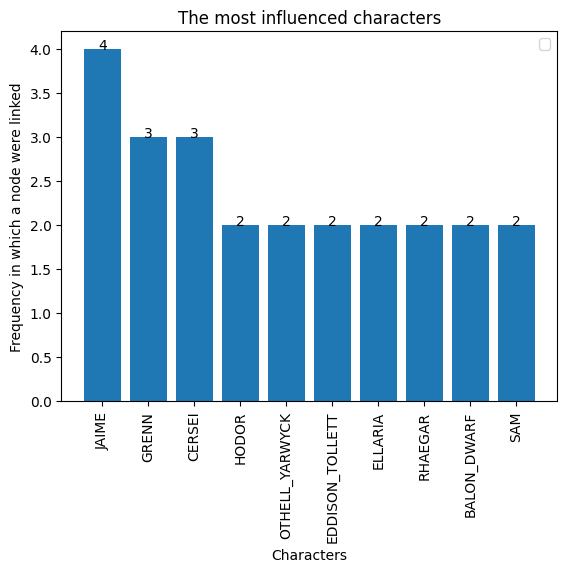

In [91]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()